In [1]:
# !pip install -r requirements.txt

import warnings
import pandas as pd
import logging
import os
import sys
from utils.LabelsDict import tickers
#from utils.load_data import *

warnings.filterwarnings("ignore", category=UserWarning, message="Unable to import Axes3D")
warnings.filterwarnings("ignore", category=UserWarning, message="Workbook contains no default style")
warnings.filterwarnings("ignore", category=UserWarning, message="YF.download() has changed argument auto_adjust default to True")


from utils.portfolio import Portfolio

# Создаем директорию для логов если её нет
os.makedirs('logs', exist_ok=True)
from utils.logger import Logger
log = Logger(__name__)

from pycbrf.toolbox import ExchangeRates, Banks

In [ ]:
# No Logger class to reset; handlers are cleared above if needed

# Define tickers list
tickers_list = [
    'GAZP', 'LKOH', 'ROSN',
    'SBER', 'VTBR', 'MOEX',
    'GMKN', 'NLMK', 'RUAL',
    'MTSS', 'RTKM', 'TTLK',
    'MGNT', 'FESH',  #LENT
]

# Recreate the Portfolio instance with the updated code
calc = Portfolio(
    dt_calc='2025-09-30',
    dt_start='2024-03-31',
    stocks_step=8,
    tickers_list=tickers_list
)

In [5]:
# 2. Загрузка рыночных данных
calc = (
    calc
    .log_system_info()
    .load_stock_data(
        use_backup_data=True,
        update_backup=False
    )
    .load_multipliers(
        use_backup=True,
        update_backup=False
    )
)

2026-01-08 23:26:31,870:utils.portfolio:INFO: Configuration Parameters
Parameter                                                                                      Value
Calculation Date                                                                          2025-09-30
Start Date                                                                                2014-03-31
Stocks Step                                                                                        8
Tickers Count                                                                                     14
Tickers           GAZP, LKOH, ROSN, SBER, VTBR, MOEX, GMKN, NLMK, RUAL, MTSS, RTKM, TTLK, MGNT, FESH
2026-01-08 23:26:32,018:utils.portfolio:INFO: Using backup data from 2014-03-31 up to 2025-09-30
2026-01-08 23:26:32,281:utils.portfolio:INFO: Loaded Stock Data Period
Start Date    End Date
2014-03-31  2025-09-30
2026-01-08 23:26:32,292:utils.portfolio:INFO: Stock Data Missing Values: No missing values found
2026-01-08 2

In [7]:
calc = calc.load_macro_data(
    update_inflation=False,
    update_rub_usd=False,
    update_unemployment=False
)

2026-01-08 23:27:17,382:utils.portfolio:INFO: Loaded unemployment data from backup
2026-01-08 23:27:17,392:utils.portfolio:INFO: Loaded Unemployment Data Period
Start Date    End Date
2014-03-31  2025-09-30
2026-01-08 23:27:17,428:utils.portfolio:INFO: Loaded inflation data from backup. Last date: 2025-09-01
2026-01-08 23:27:17,441:utils.portfolio:INFO: Loaded Inflation Data Period
Start Date    End Date
2014-03-31  2025-09-30
2026-01-08 23:27:17,452:utils.portfolio:INFO: Loaded USD/RUB exchange rate from backup. Last date: 2025-11-30
2026-01-08 23:27:17,472:utils.portfolio:INFO: Loaded USD/RUB Exchange Rate Period
Start Date    End Date
2014-03-31  2025-09-30


In [10]:
calc = calc.create_portfolio()

2026-01-08 23:27:37,436:utils.portfolio:INFO: Portfolio Missing Values Before Filling
Column                    Value
P/E                      15.31%
Долг, млрд руб           42.37%
Капитализация, млрд руб  11.79%
Чистый долг, млрд руб    11.79%
debt                     32.46%
2026-01-08 23:27:37,537:utils.portfolio:INFO: Portfolio Dimensions
Total Rows  Unique Companies                Date Range
40609                     14  2014-03-31 to 2025-09-30
2026-01-08 23:27:37,543:utils.portfolio:INFO: Portfolio Missing Values After Filling
Column                  Value
P/E                    15.31%
Долг, млрд руб         42.37%
Чистый долг, млрд руб  11.79%


In [11]:
calc = calc.add_dynamic_features()

2026-01-08 23:27:48,318:utils.portfolio:INFO: Portfolio Missing Values After Adding dynamic features
Column                  Value
P/E                    15.31%
Долг, млрд руб         42.37%
Чистый долг, млрд руб  11.79%


2026-01-08 23:27:53,573:utils.portfolio:INFO: Starting Merton model calculations for 40609 rows...


Solving Merton equations: 100%|██████████| 40609/40609 [08:02<00:00, 84.17it/s]  


2026-01-08 23:35:56,072:utils.portfolio:INFO: Capital cost and capital volatility calculated.
2026-01-08 23:35:56,077:utils.portfolio:INFO: Merton's probabilities of default calculated.


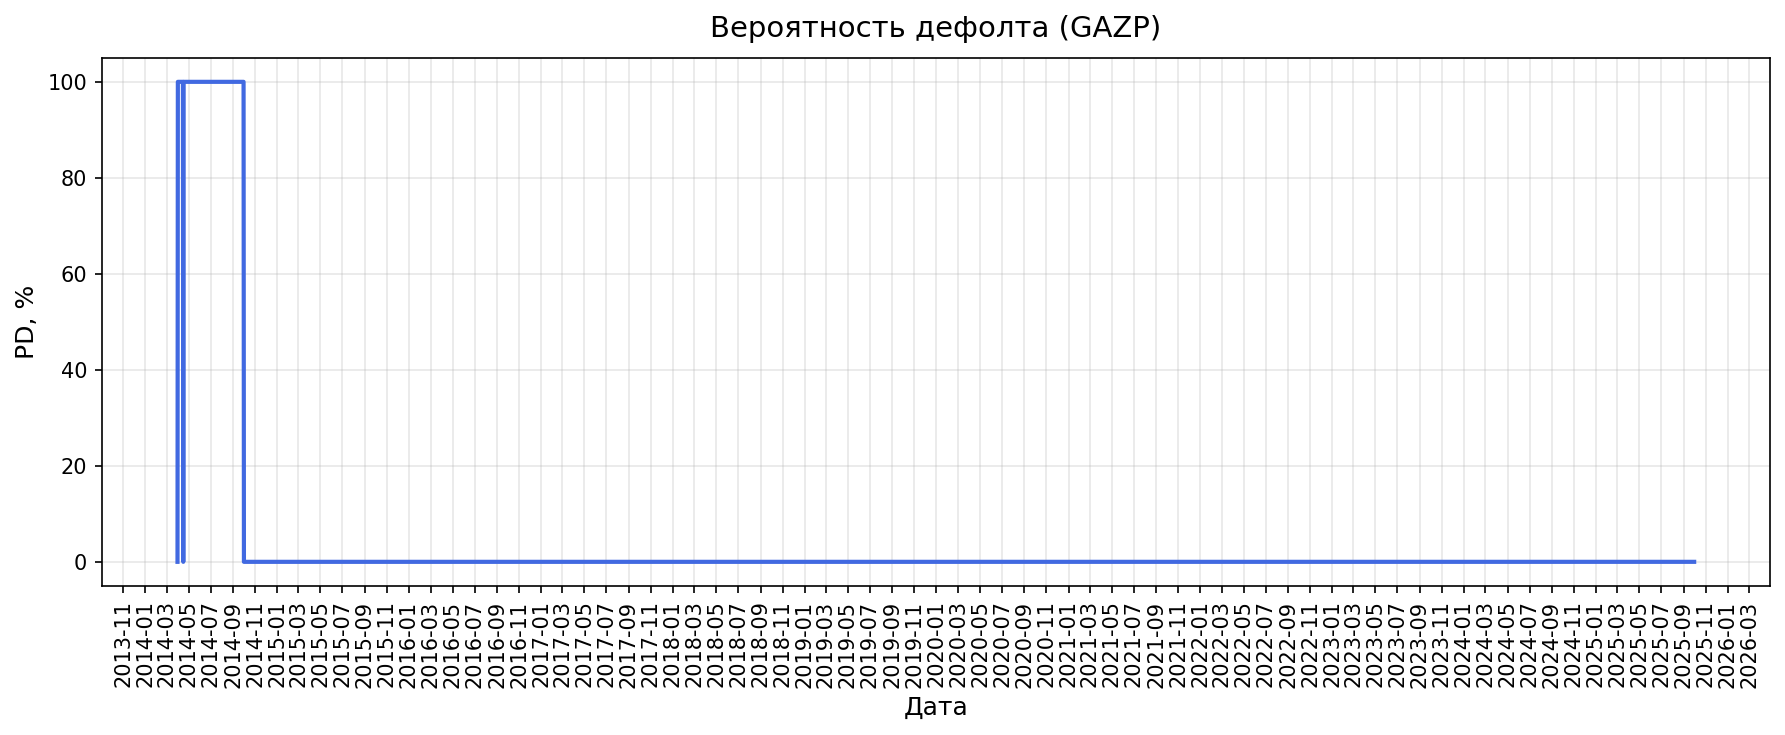

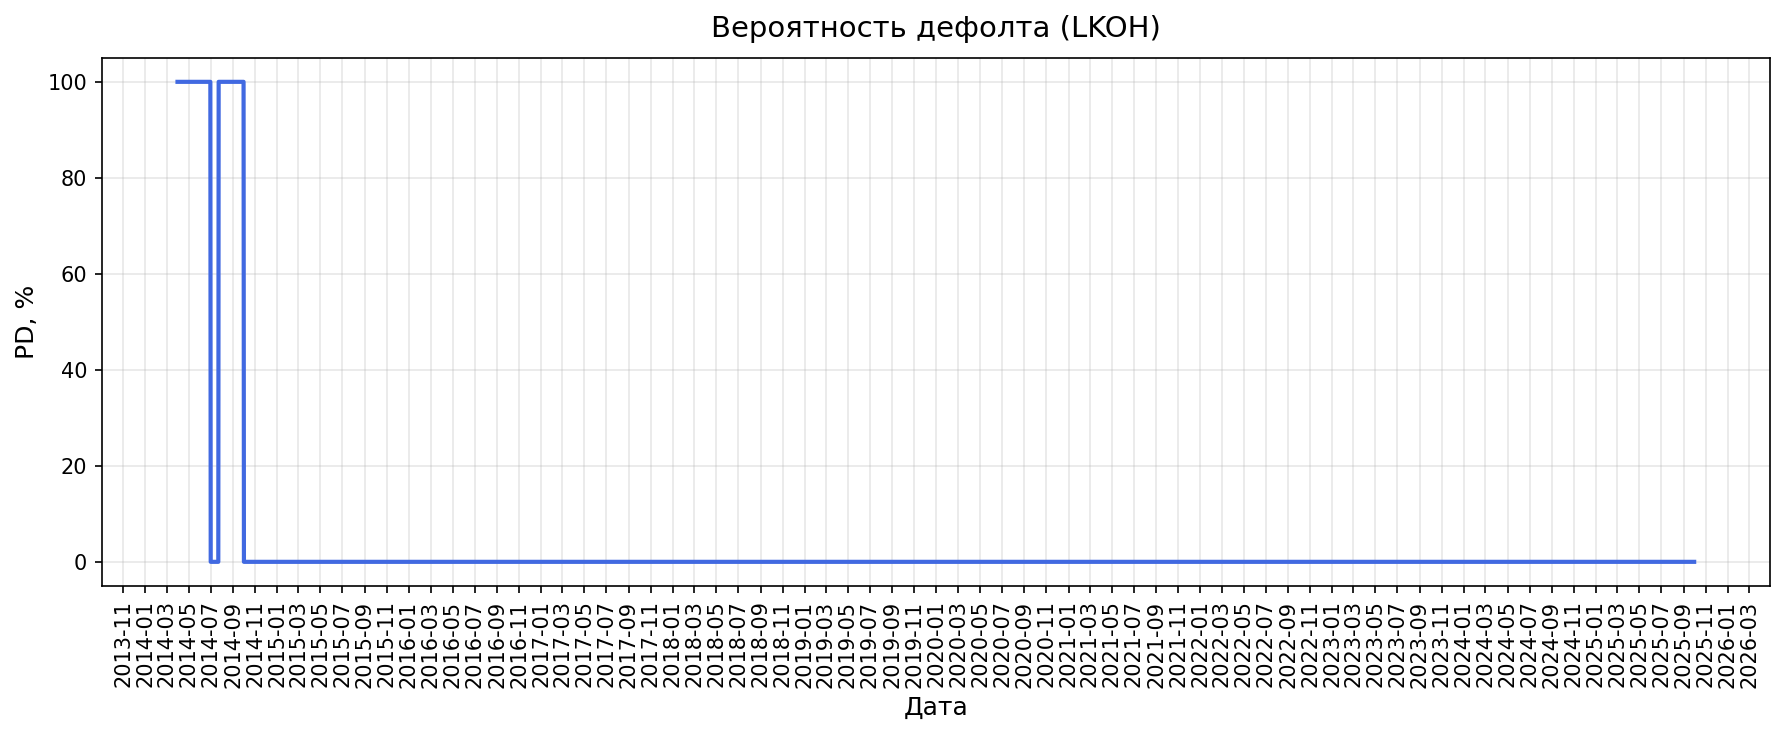

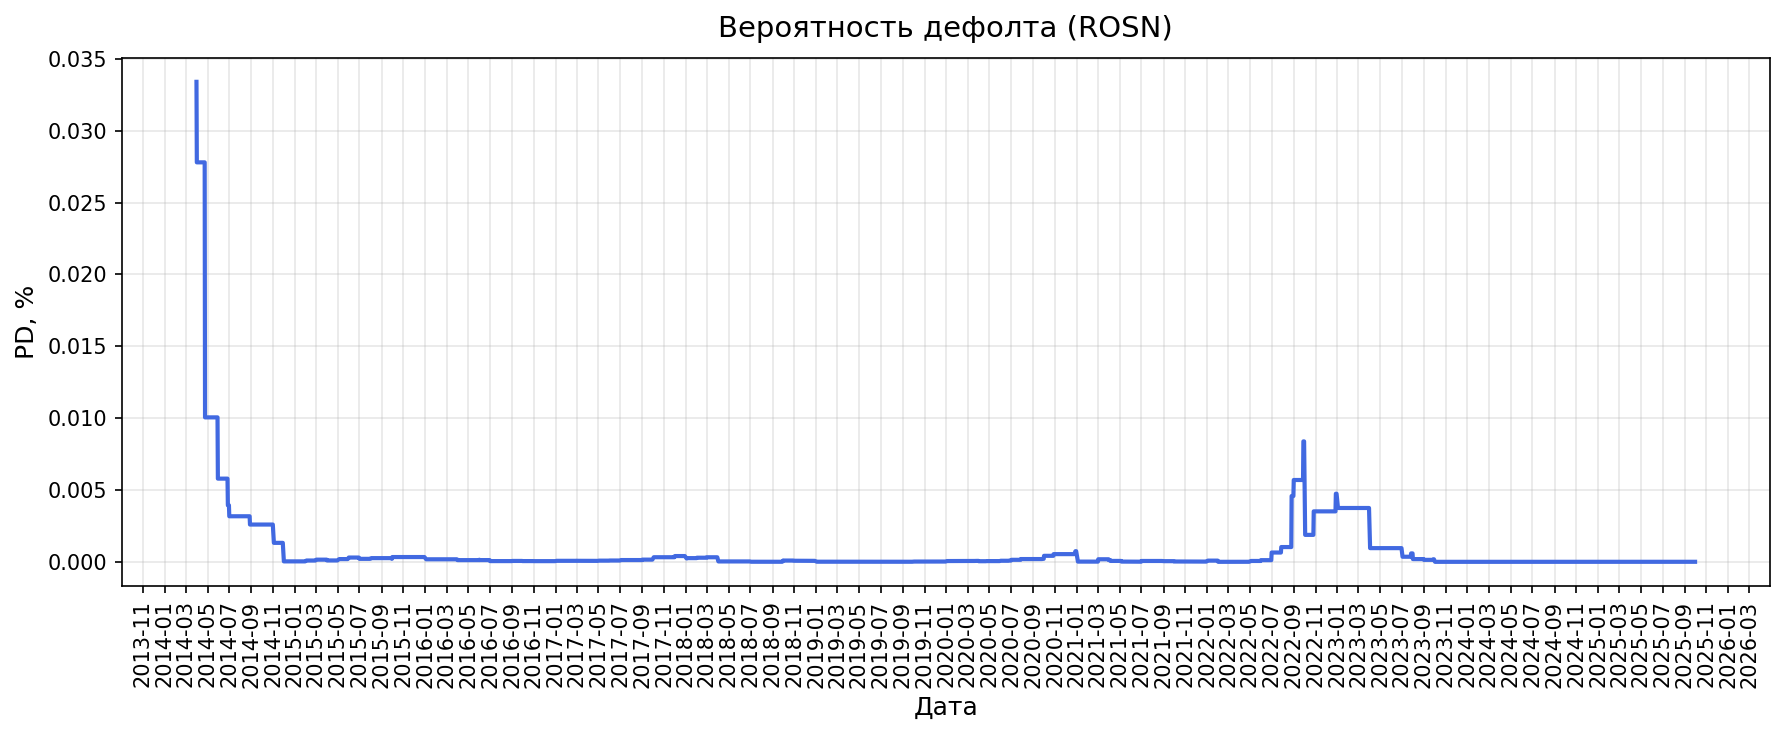

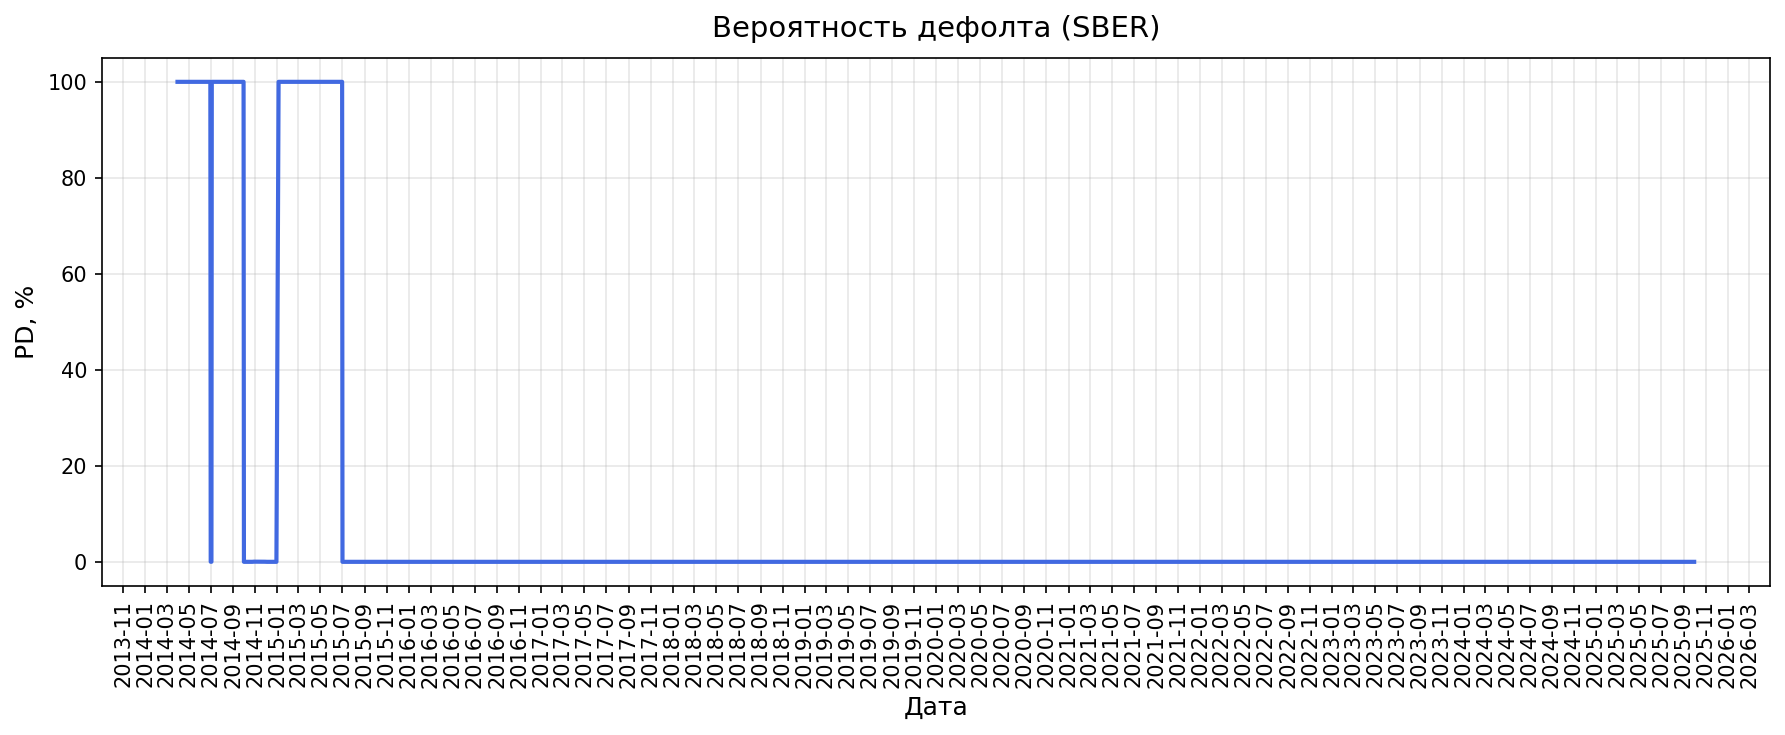

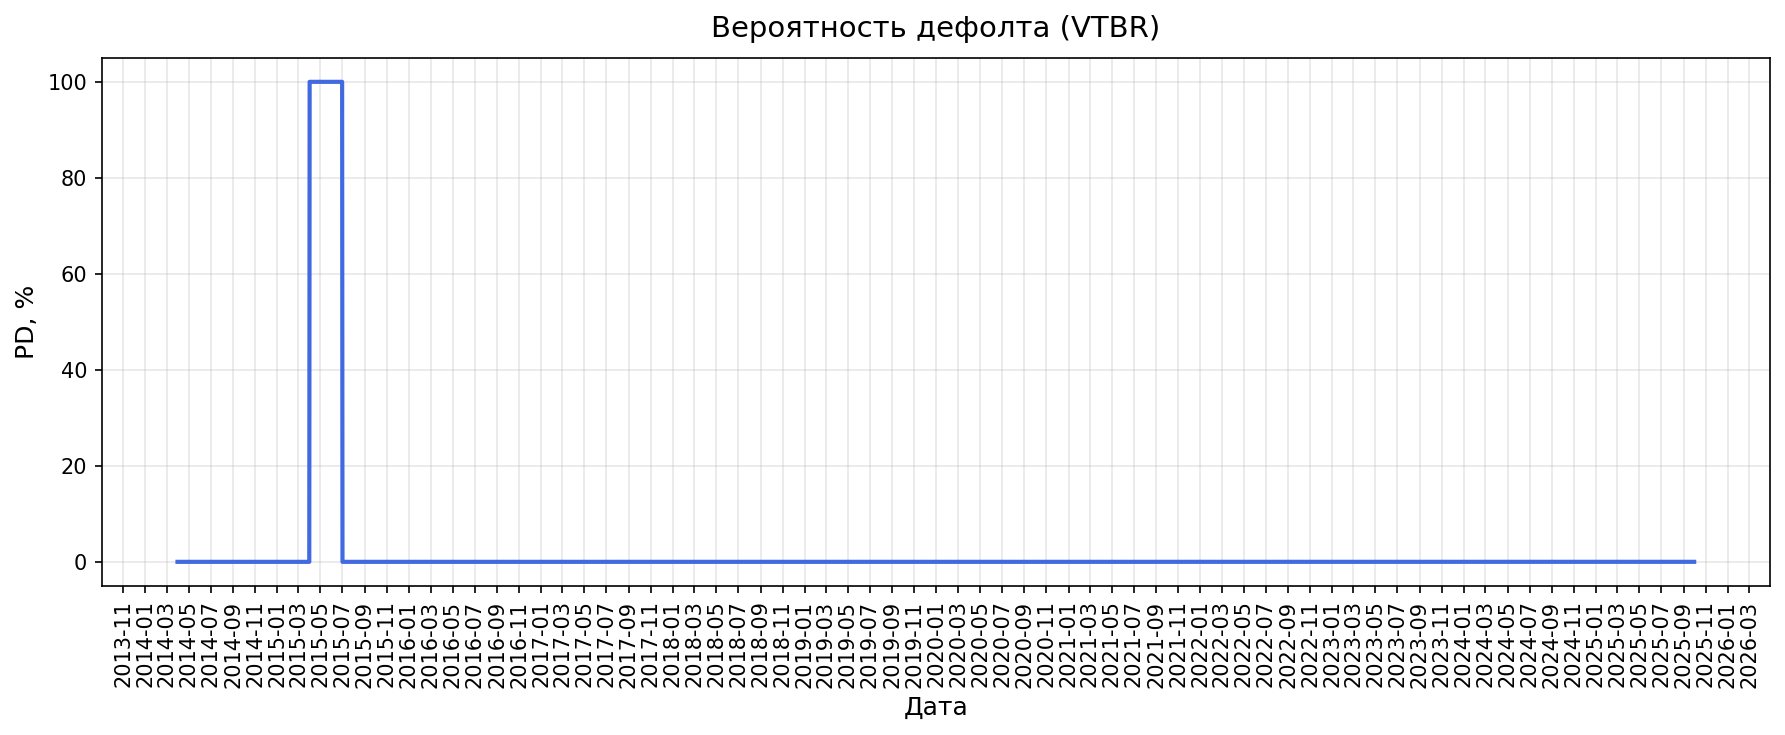

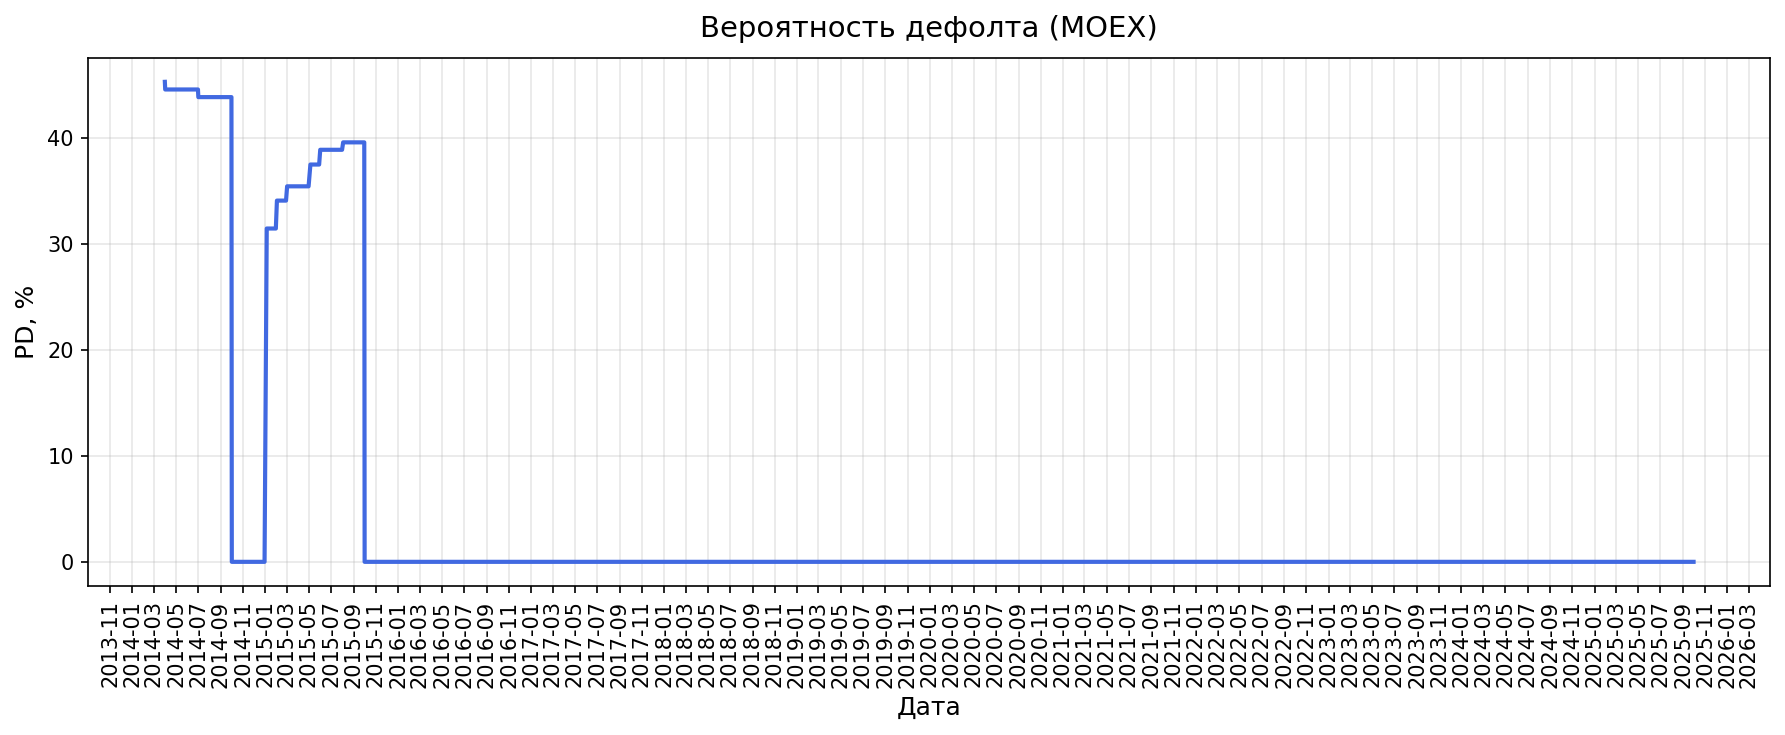

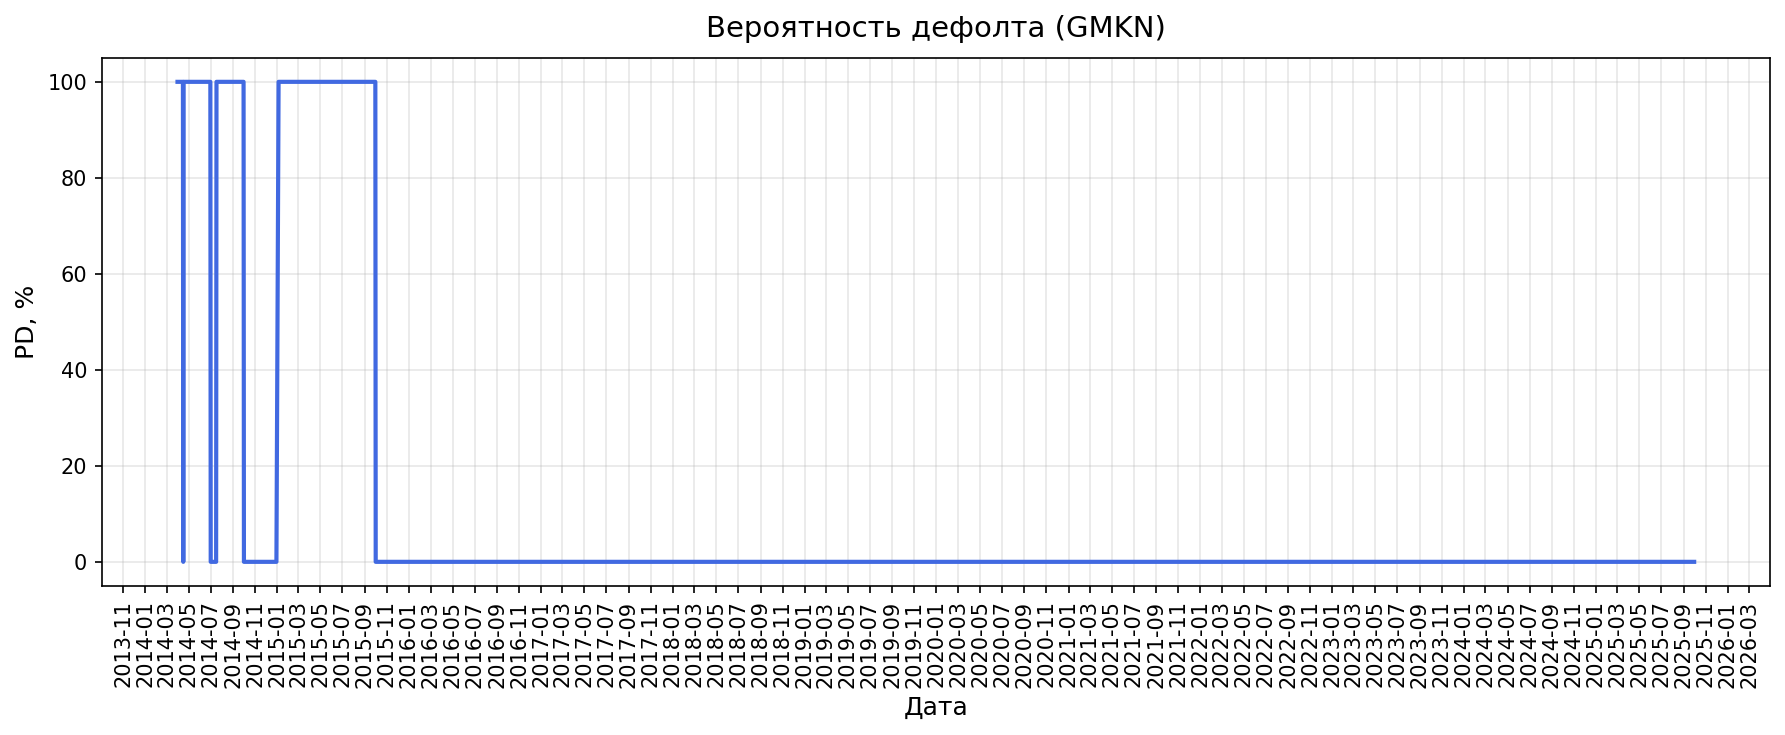

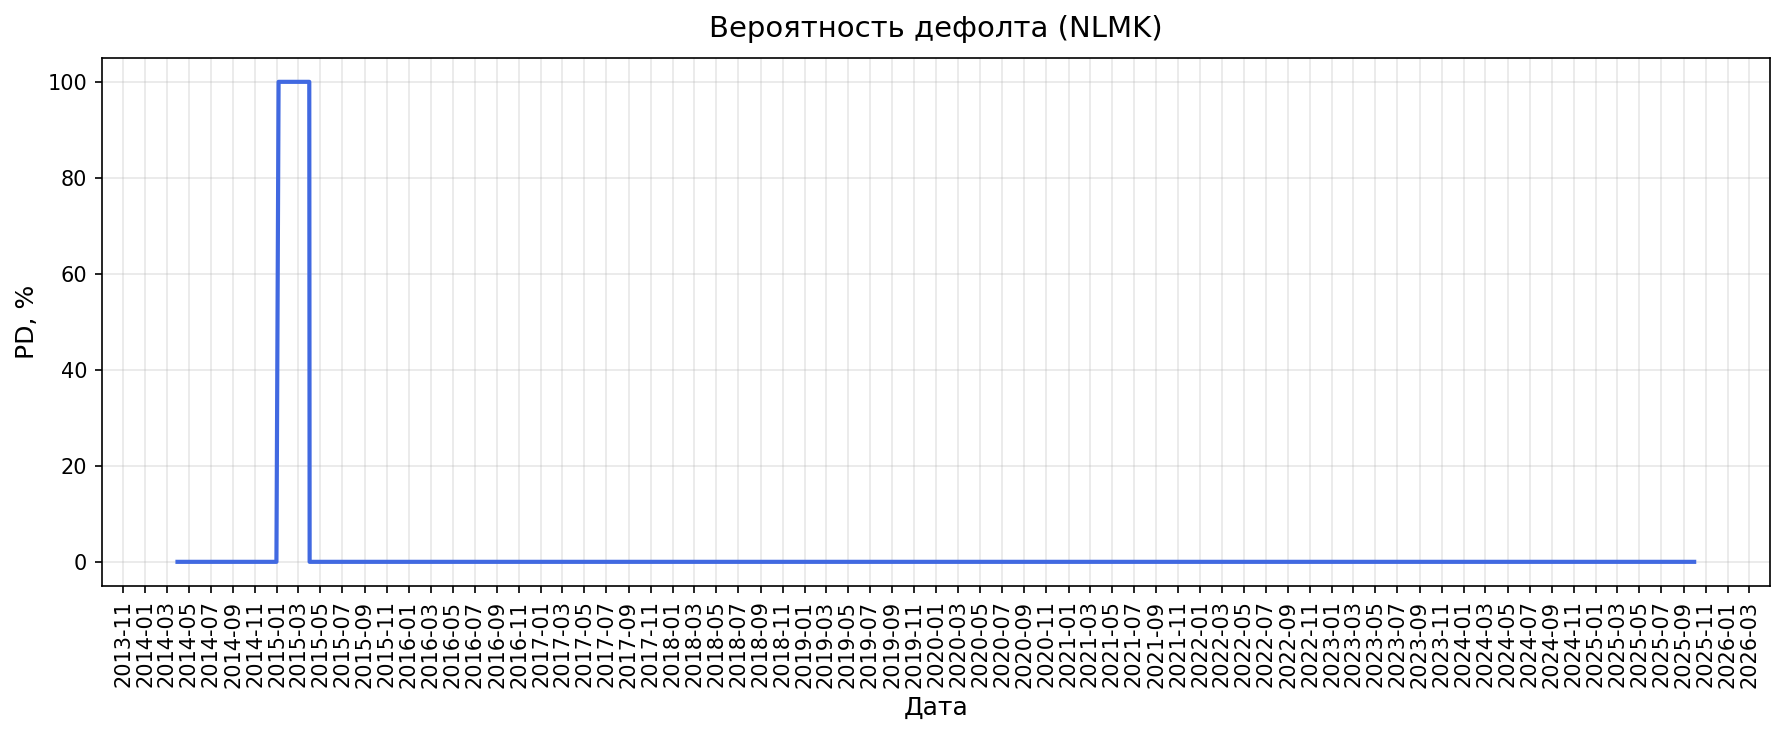

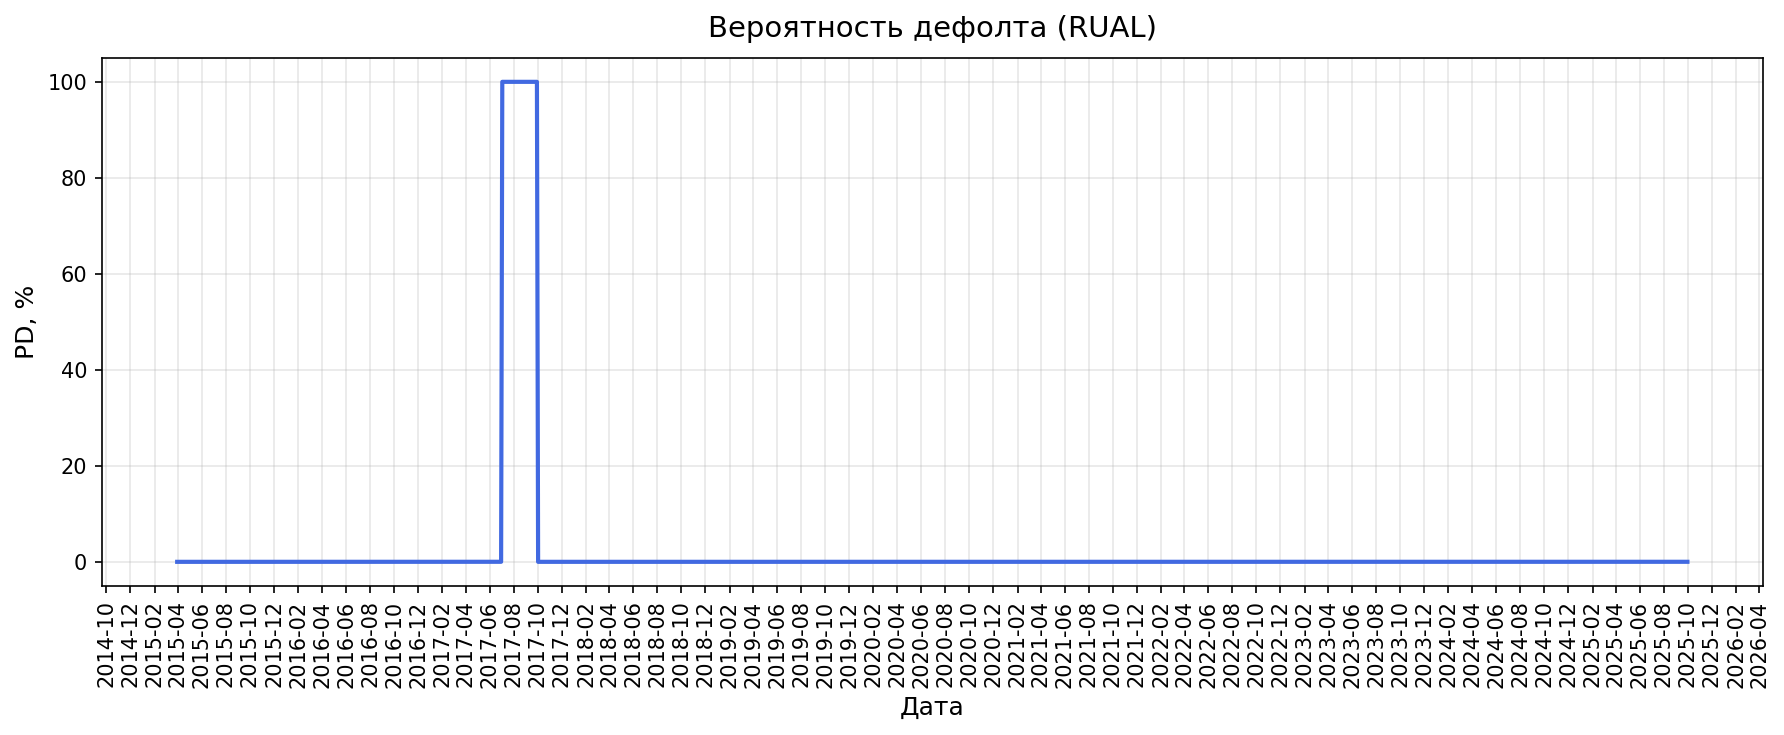

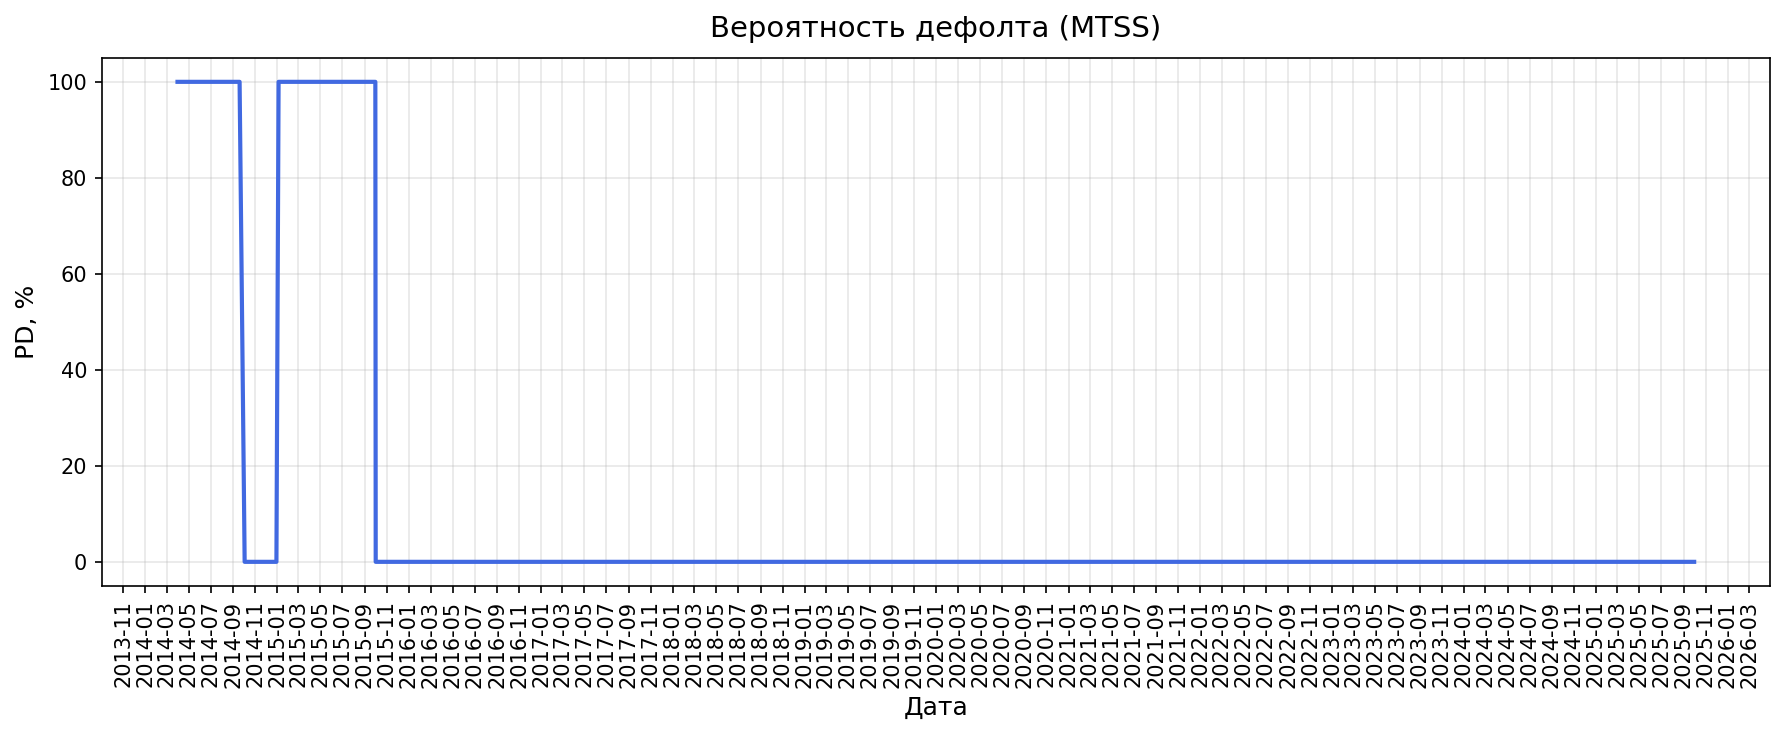

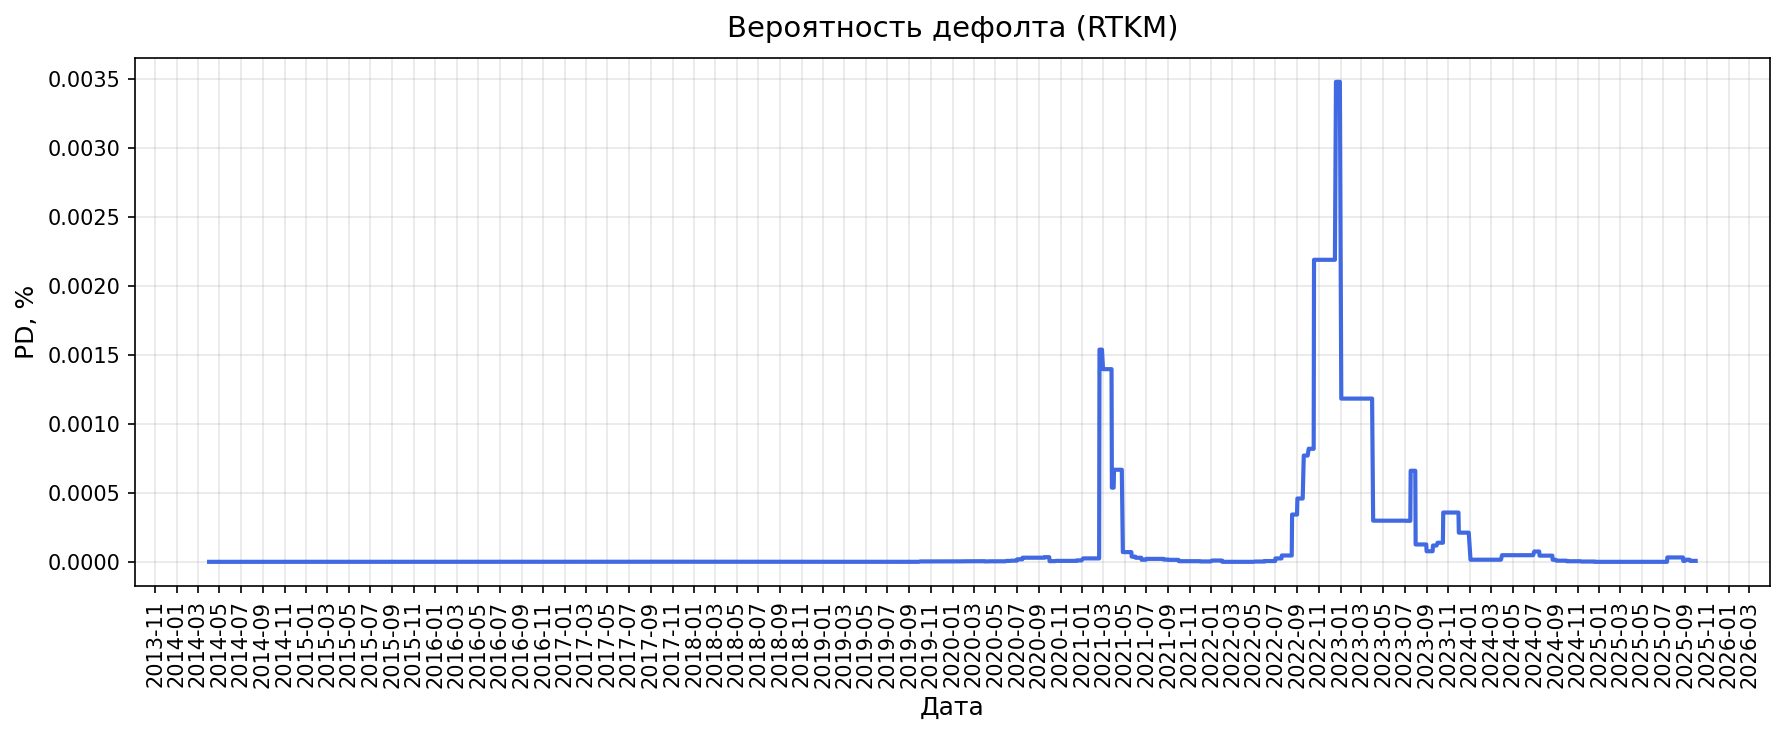

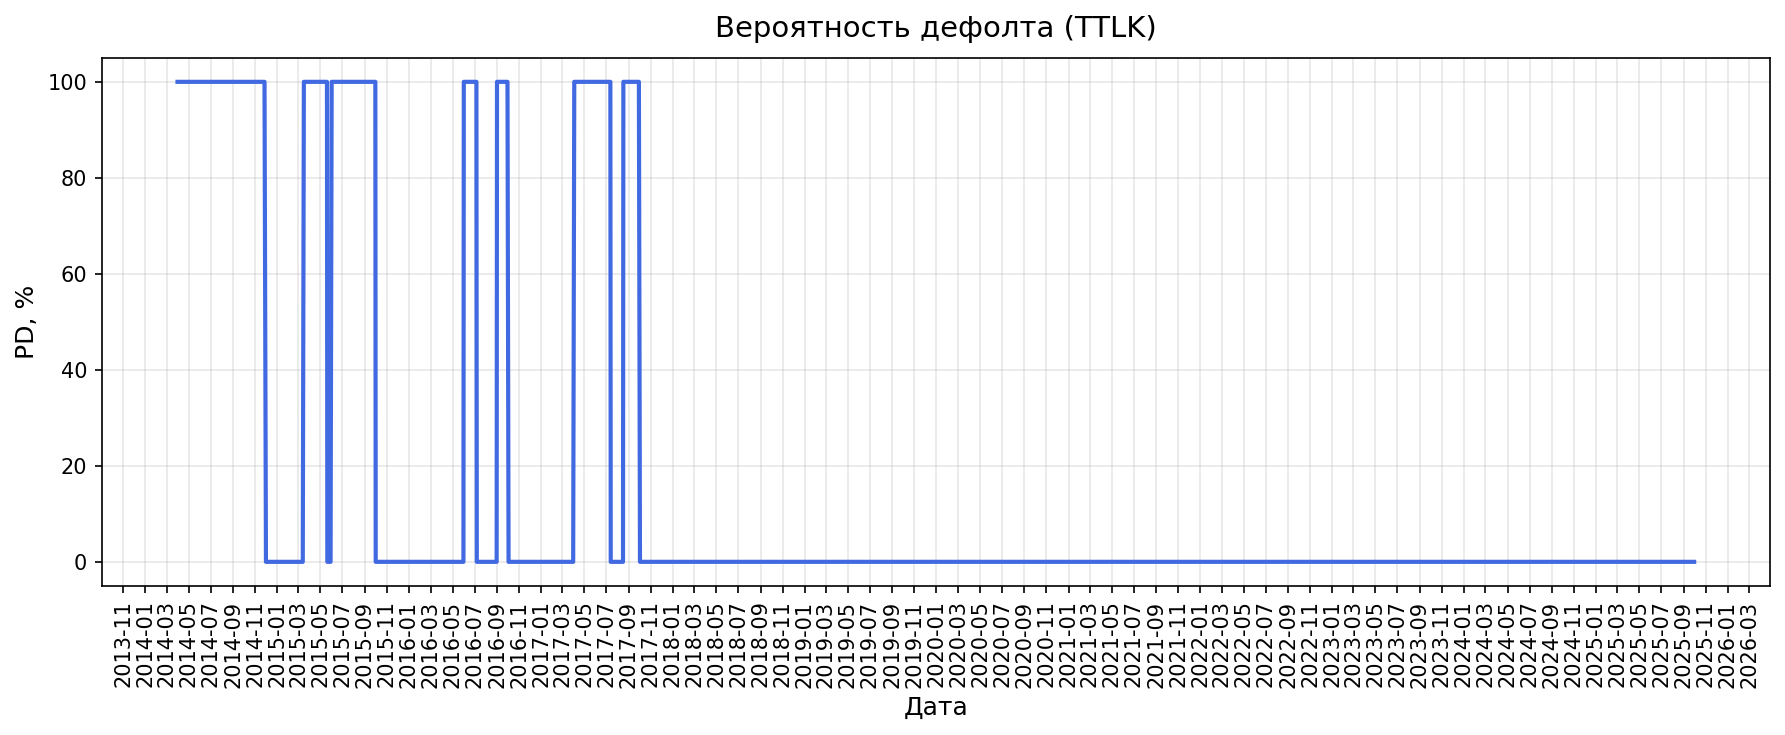

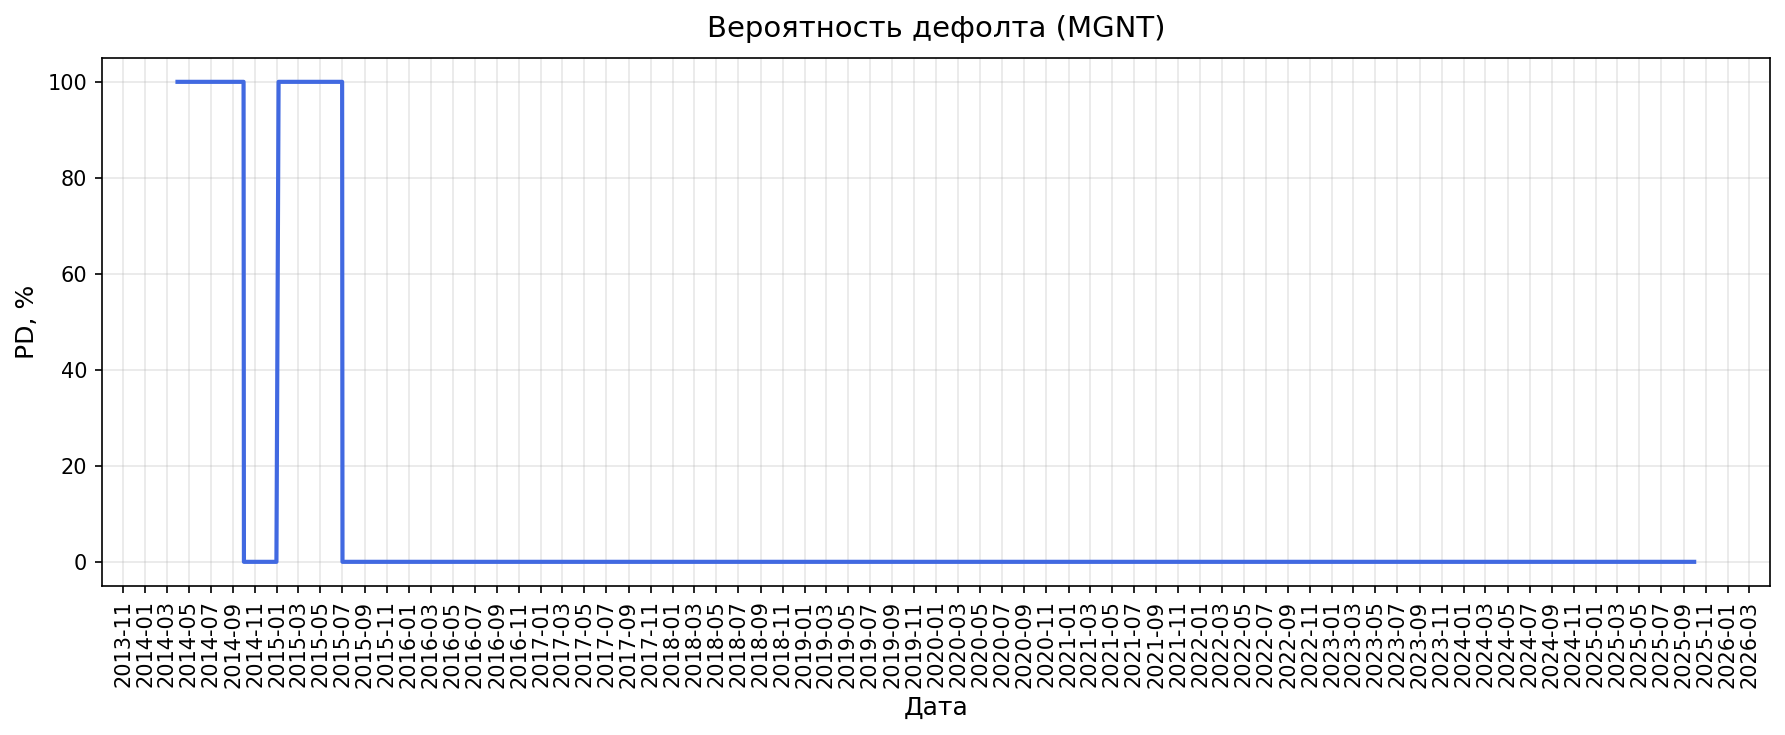

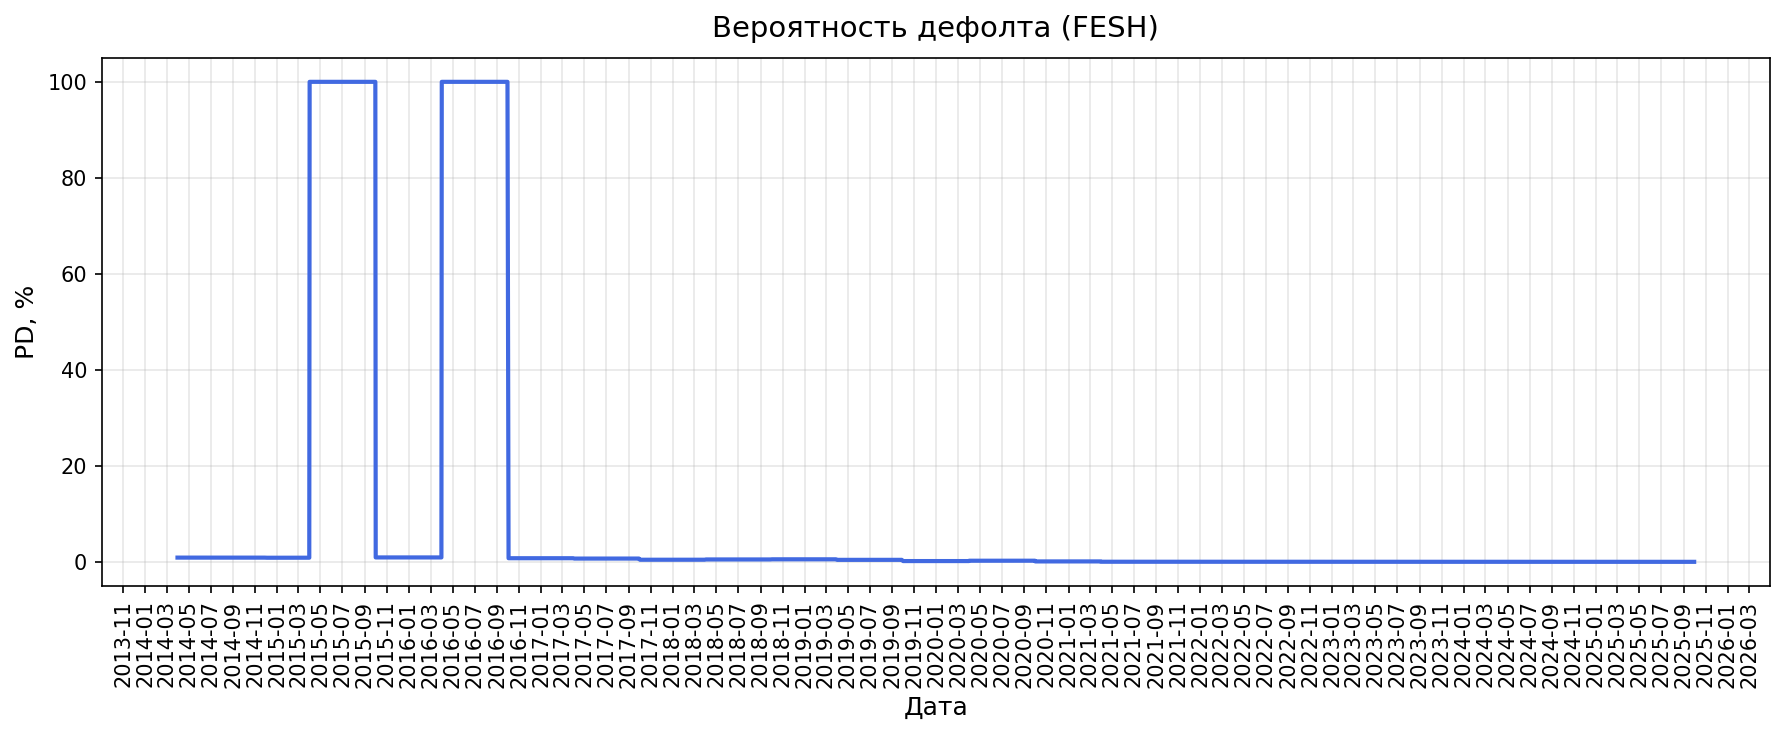

2026-01-08 23:36:19,776:utils.plots:INFO: PD graphs saved: logs/graphs/


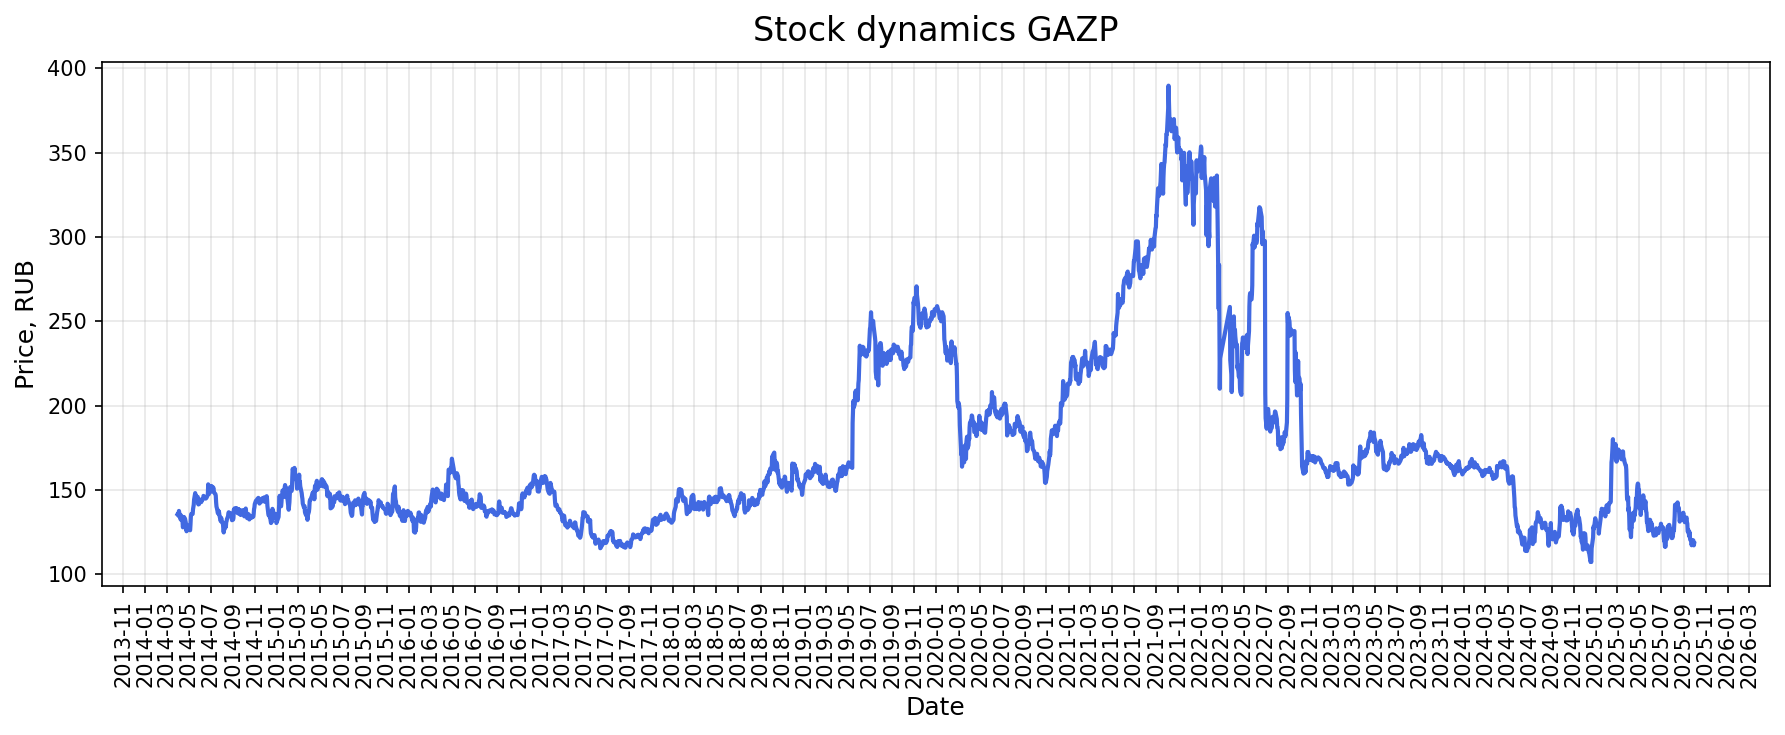

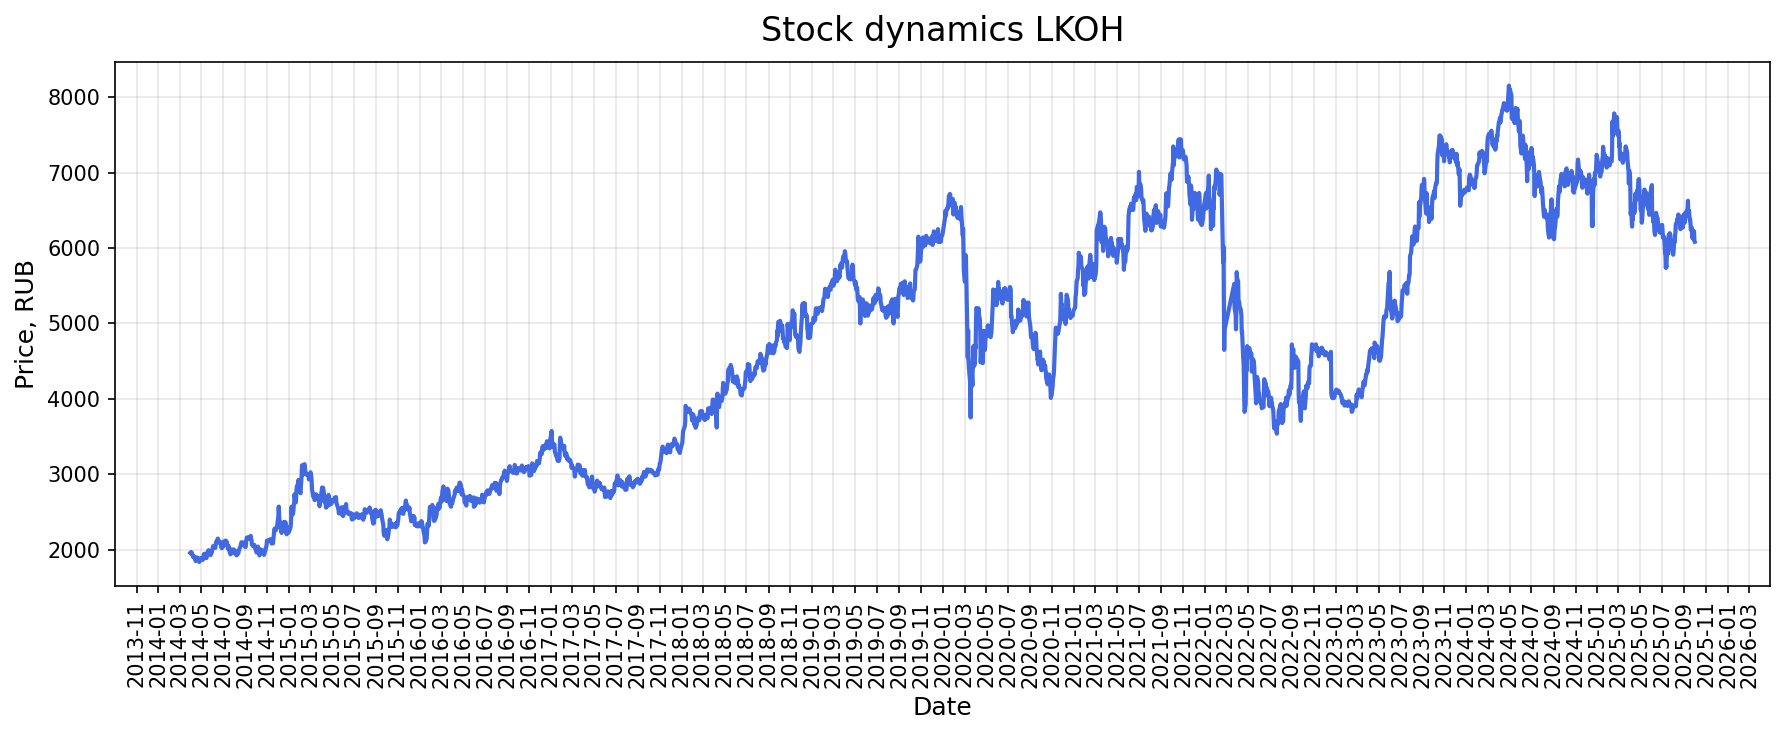

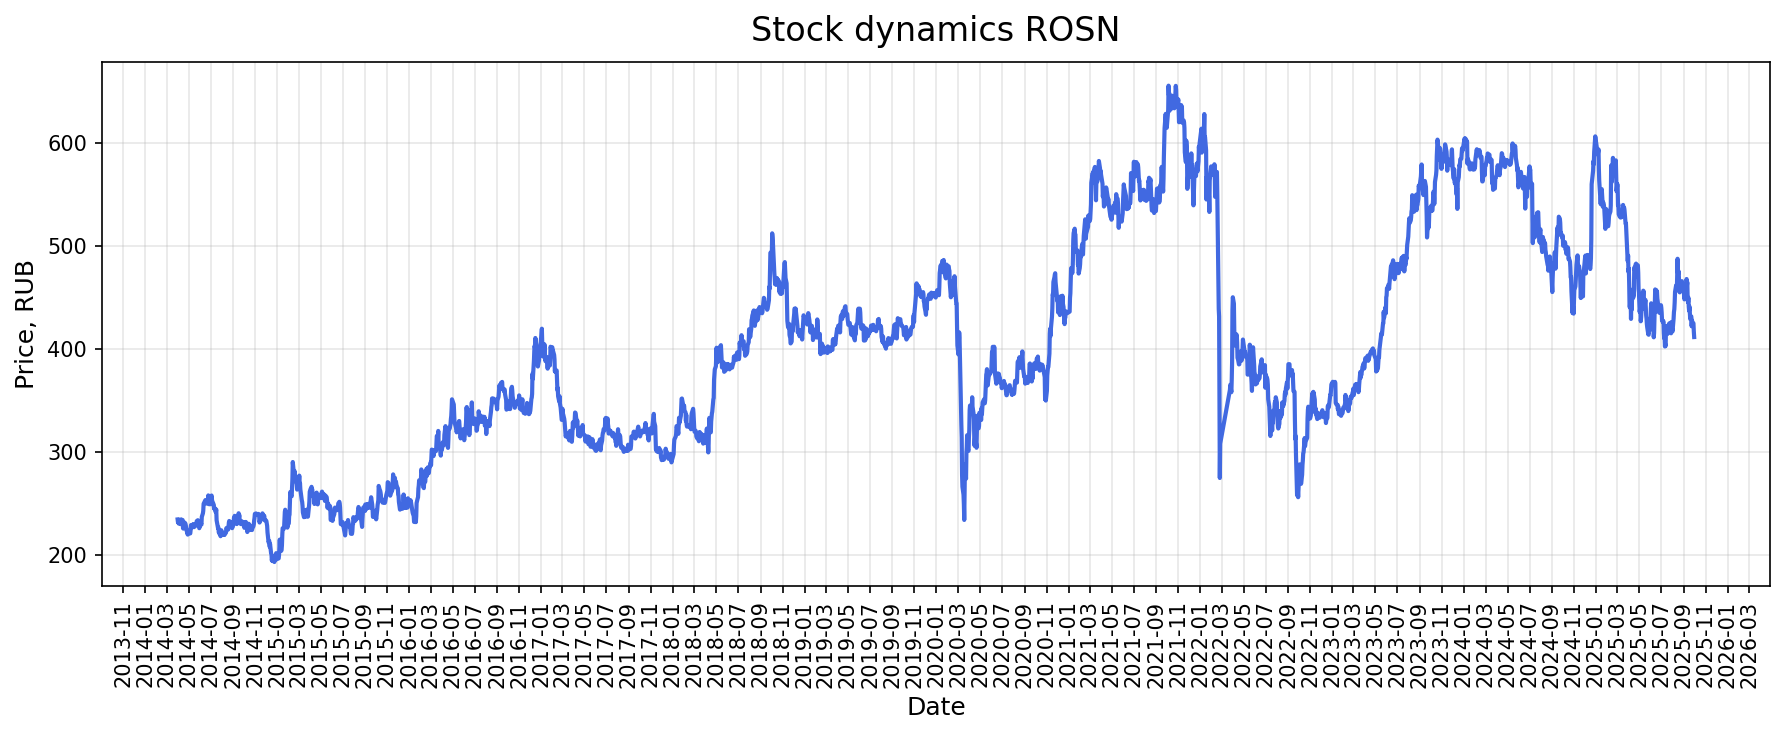

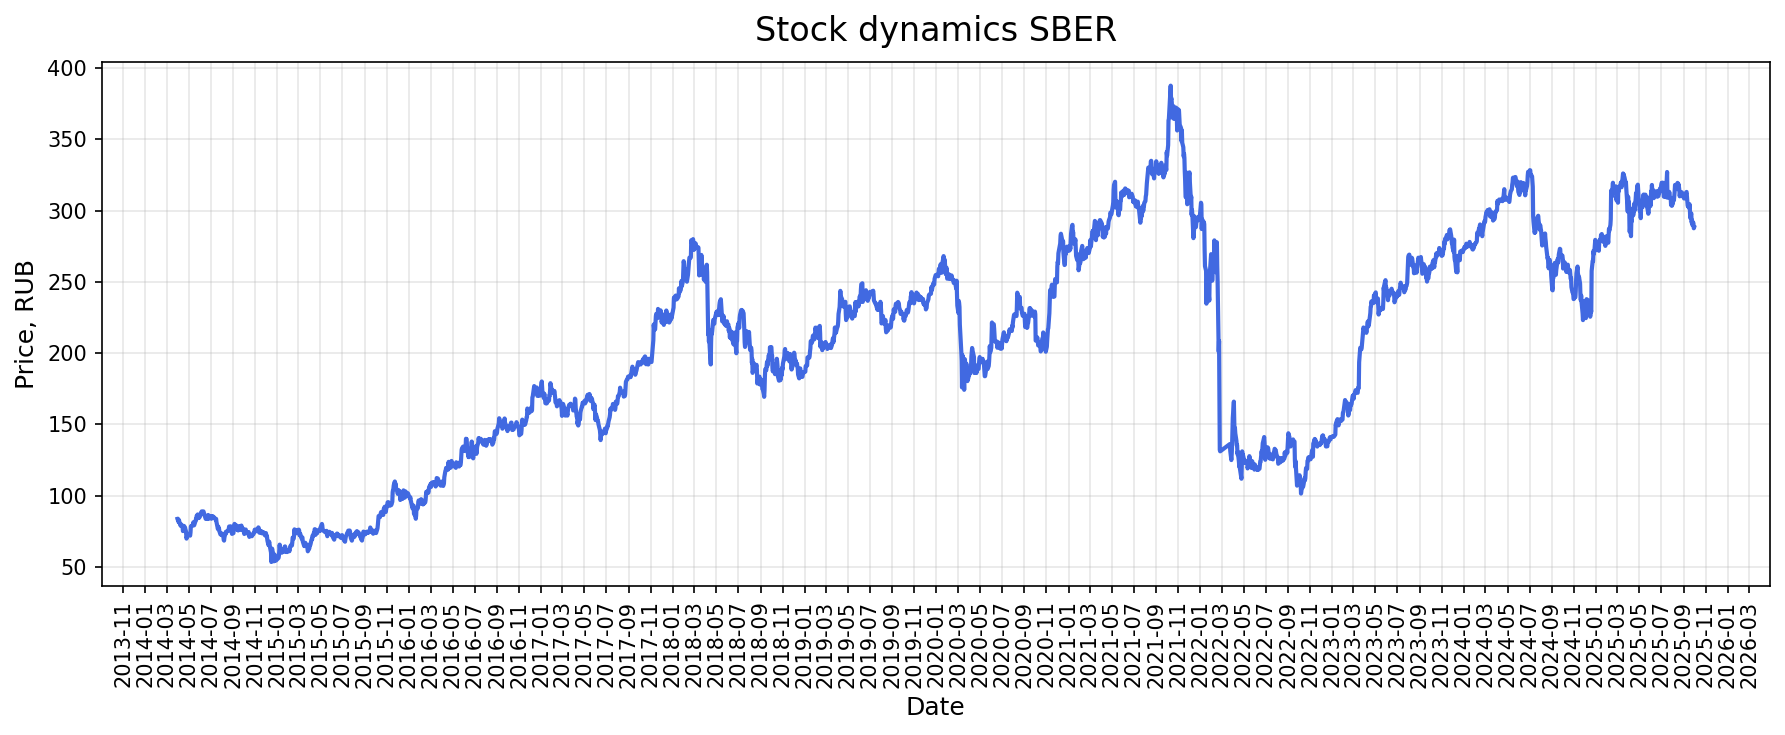

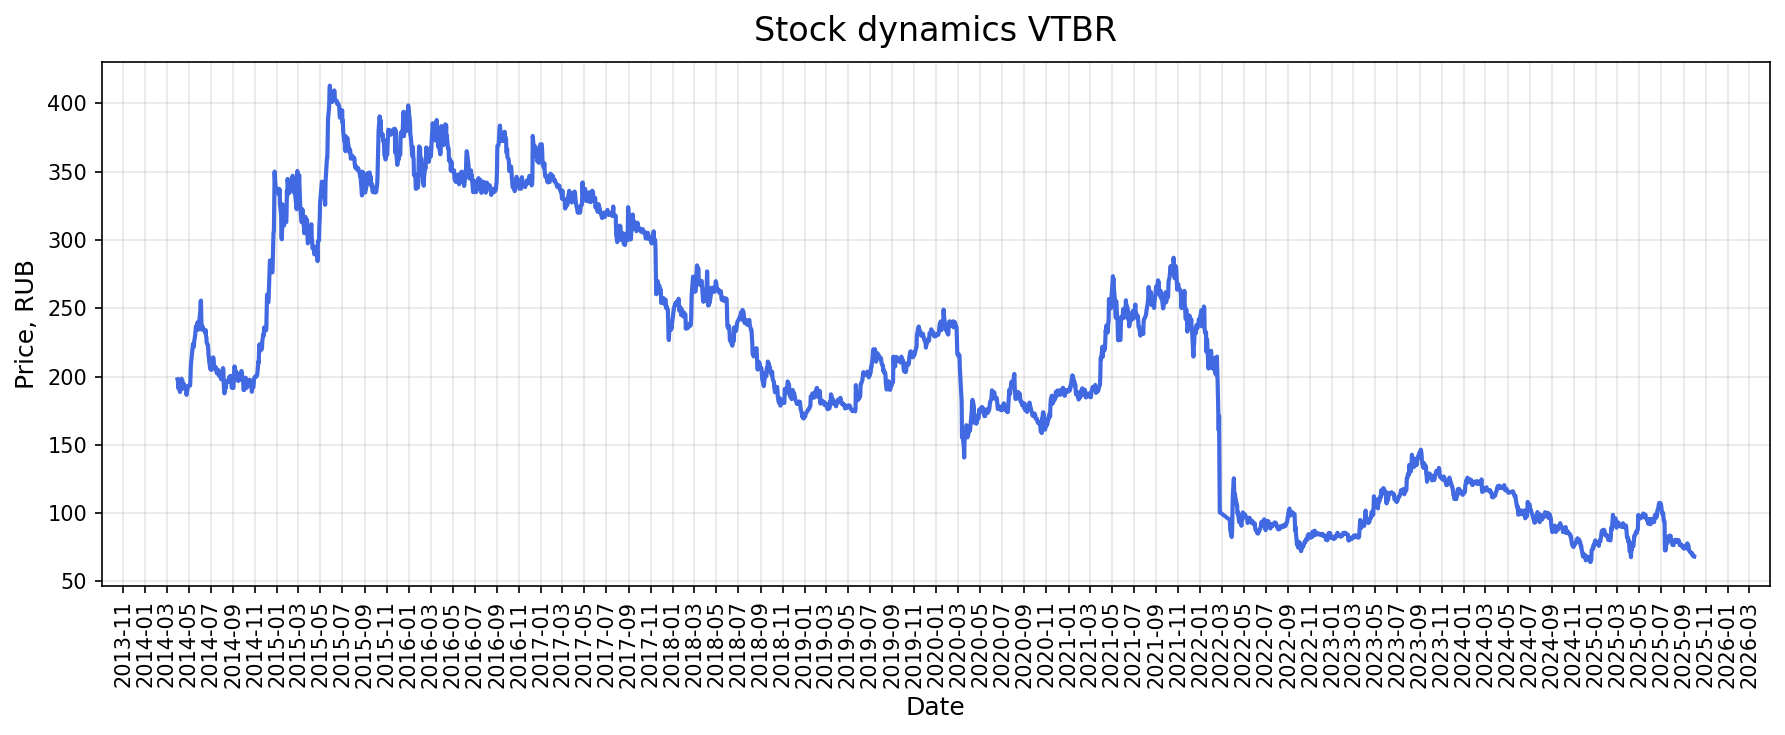

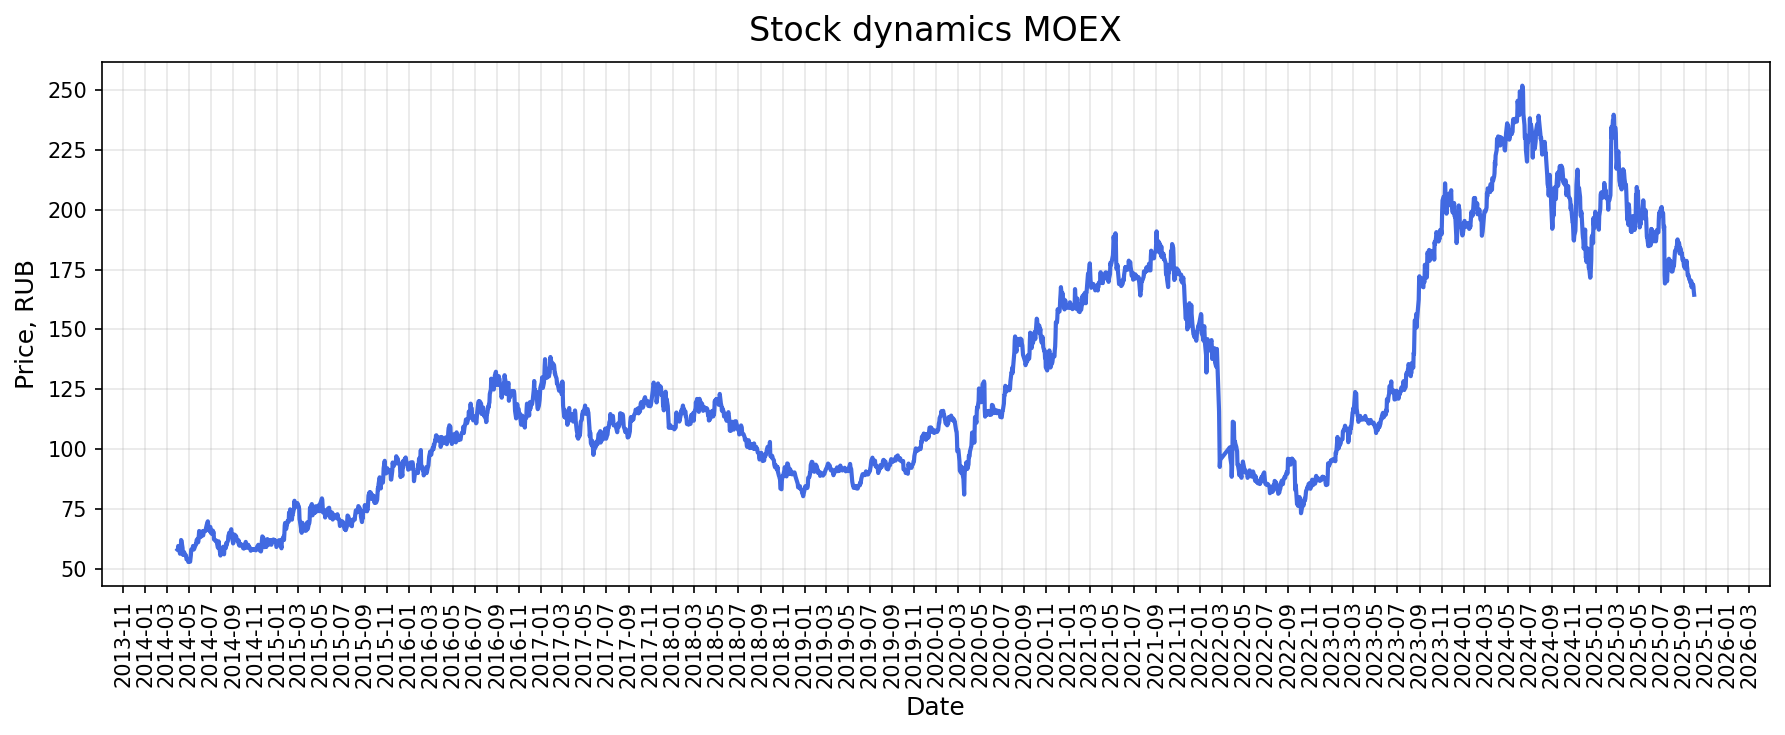

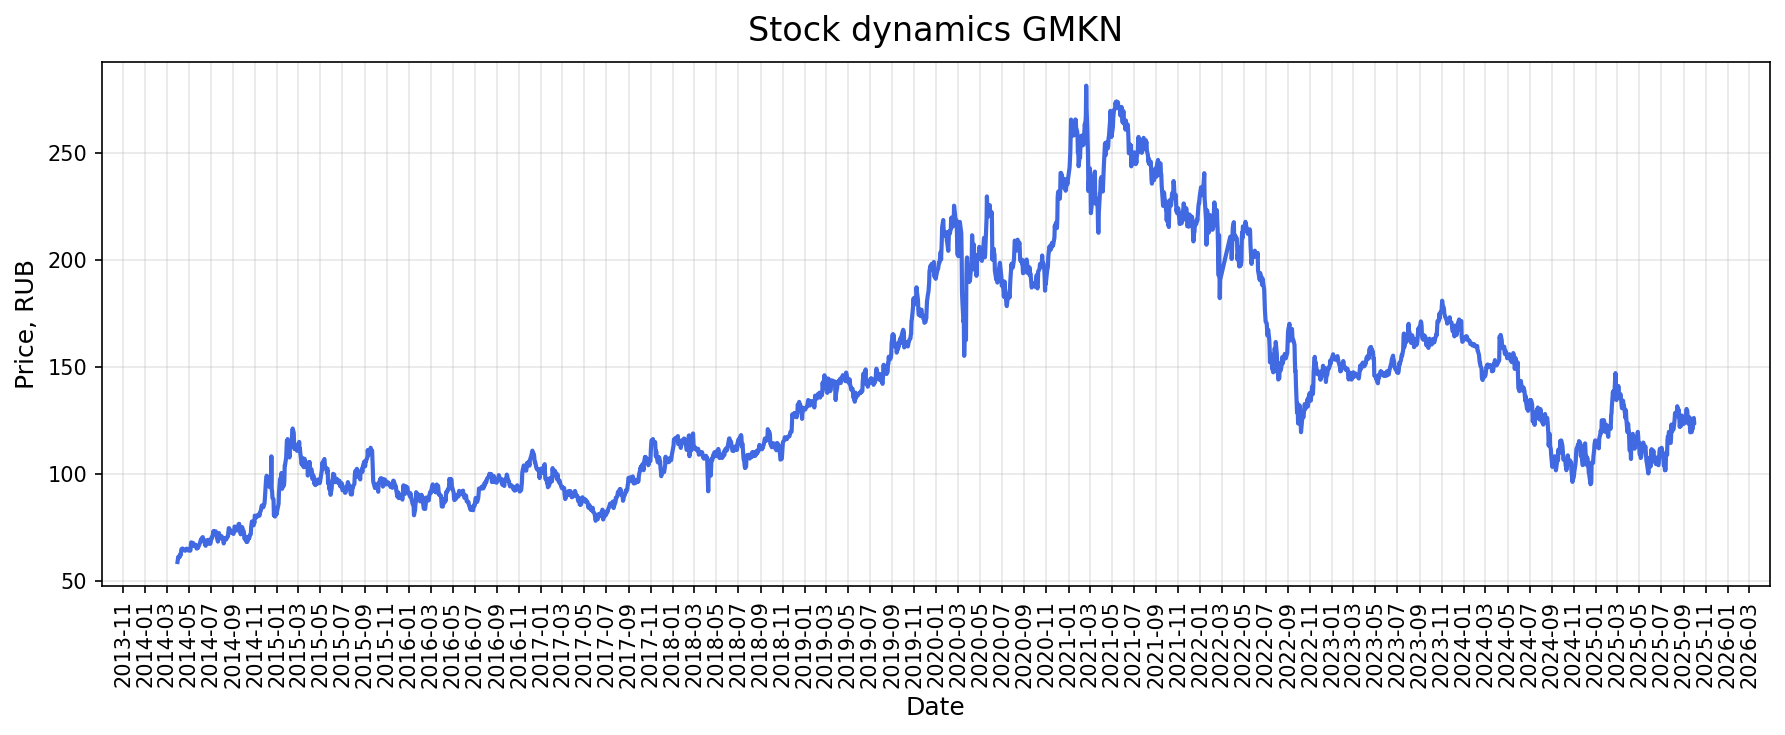

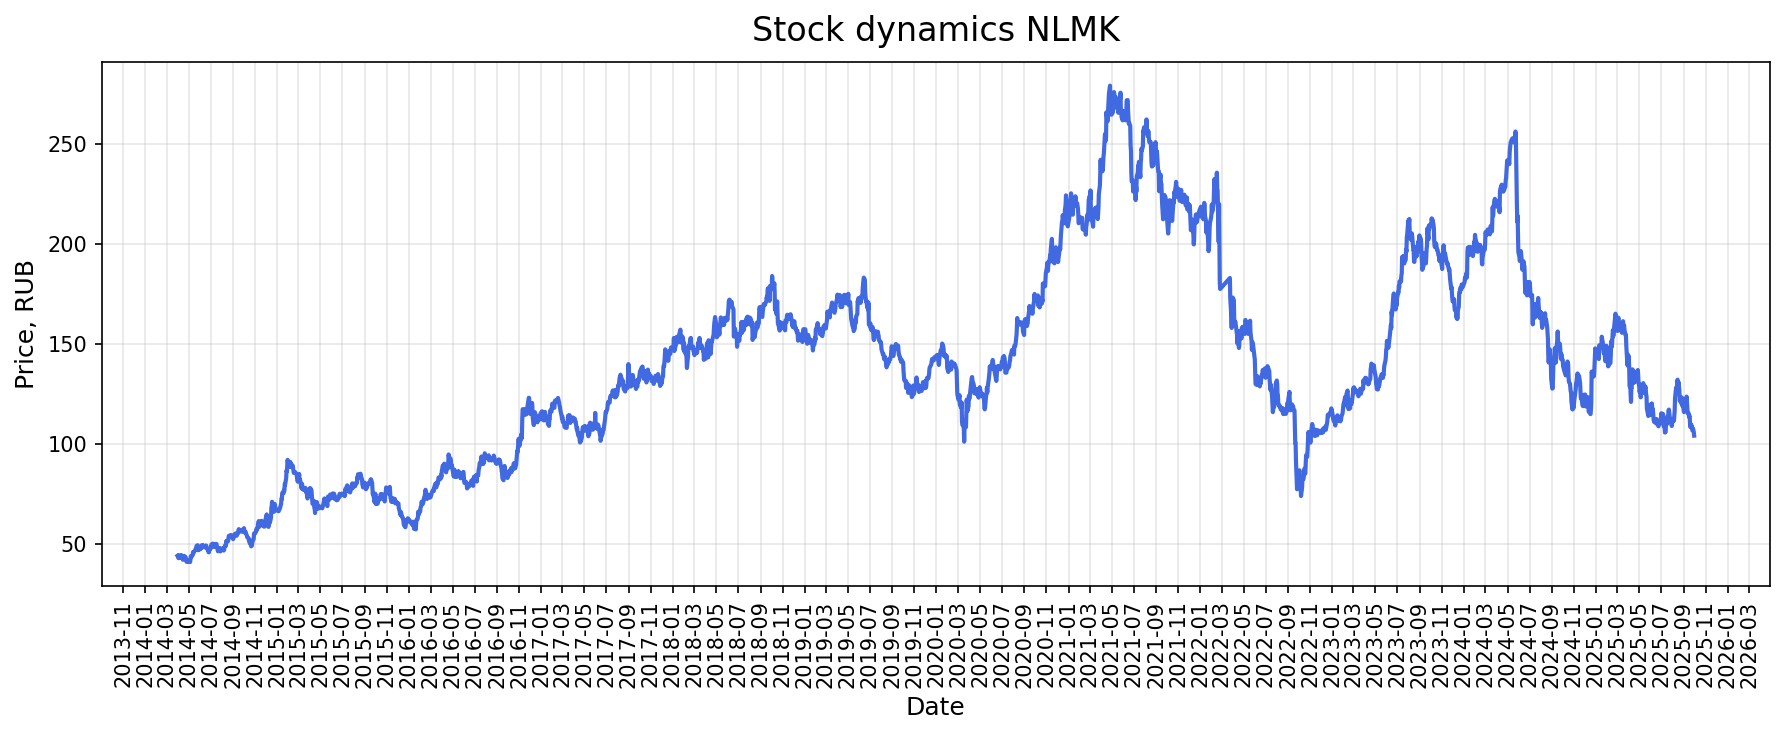

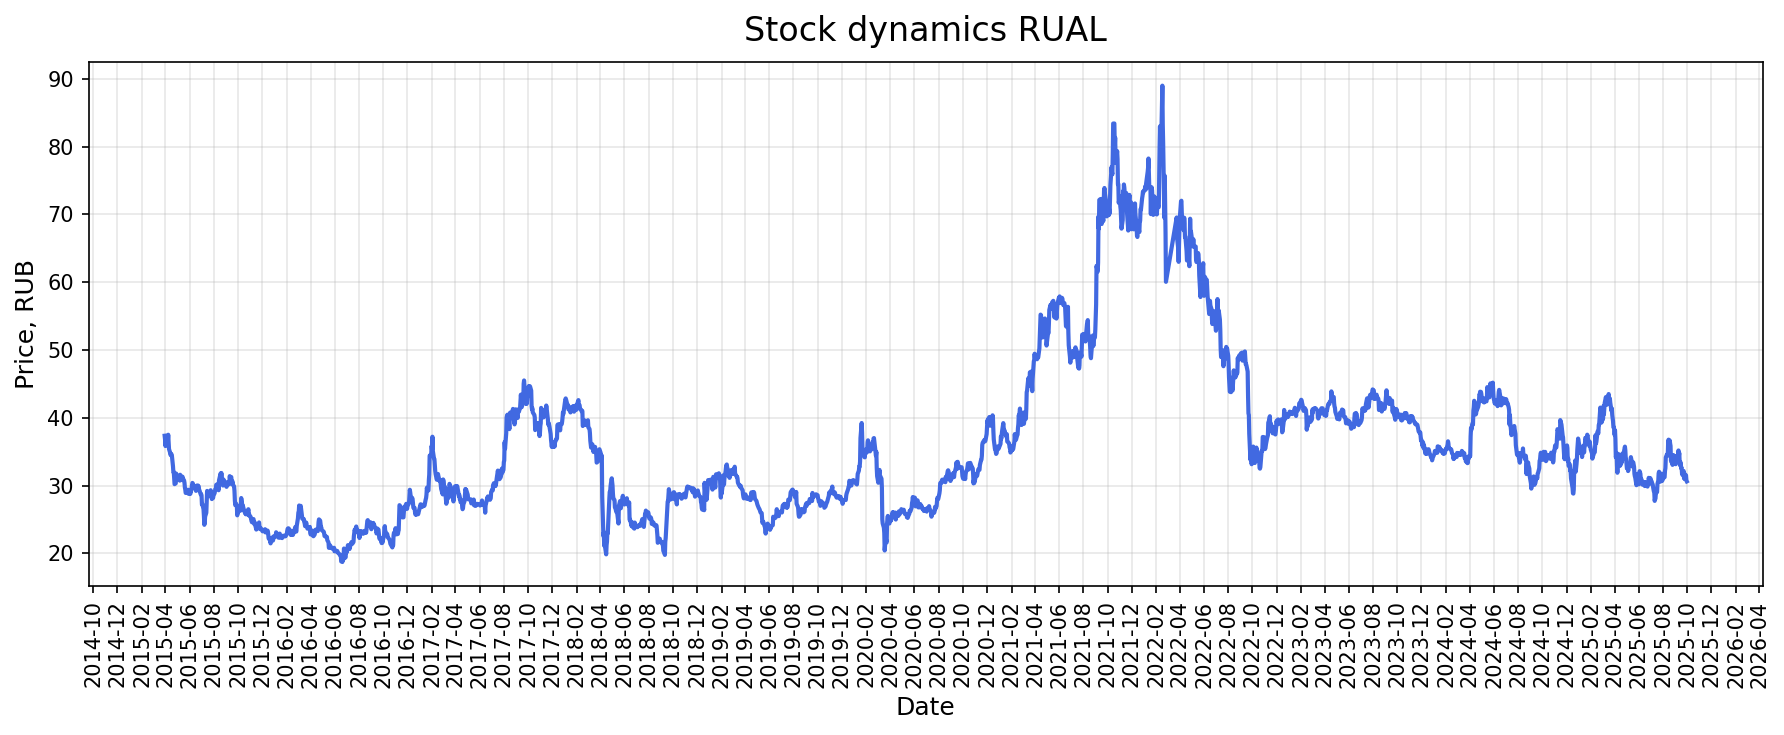

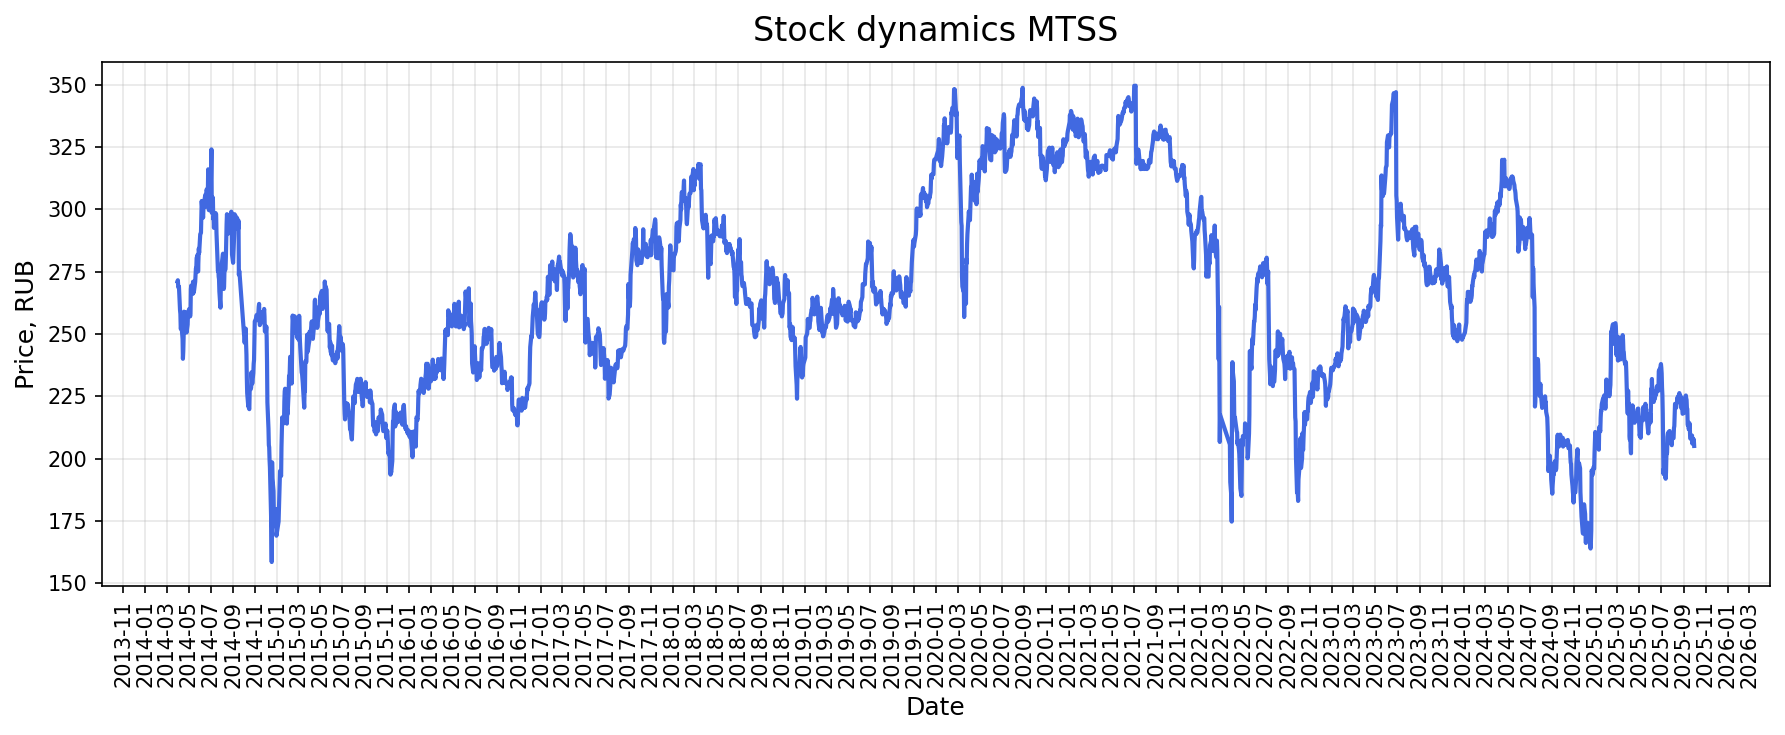

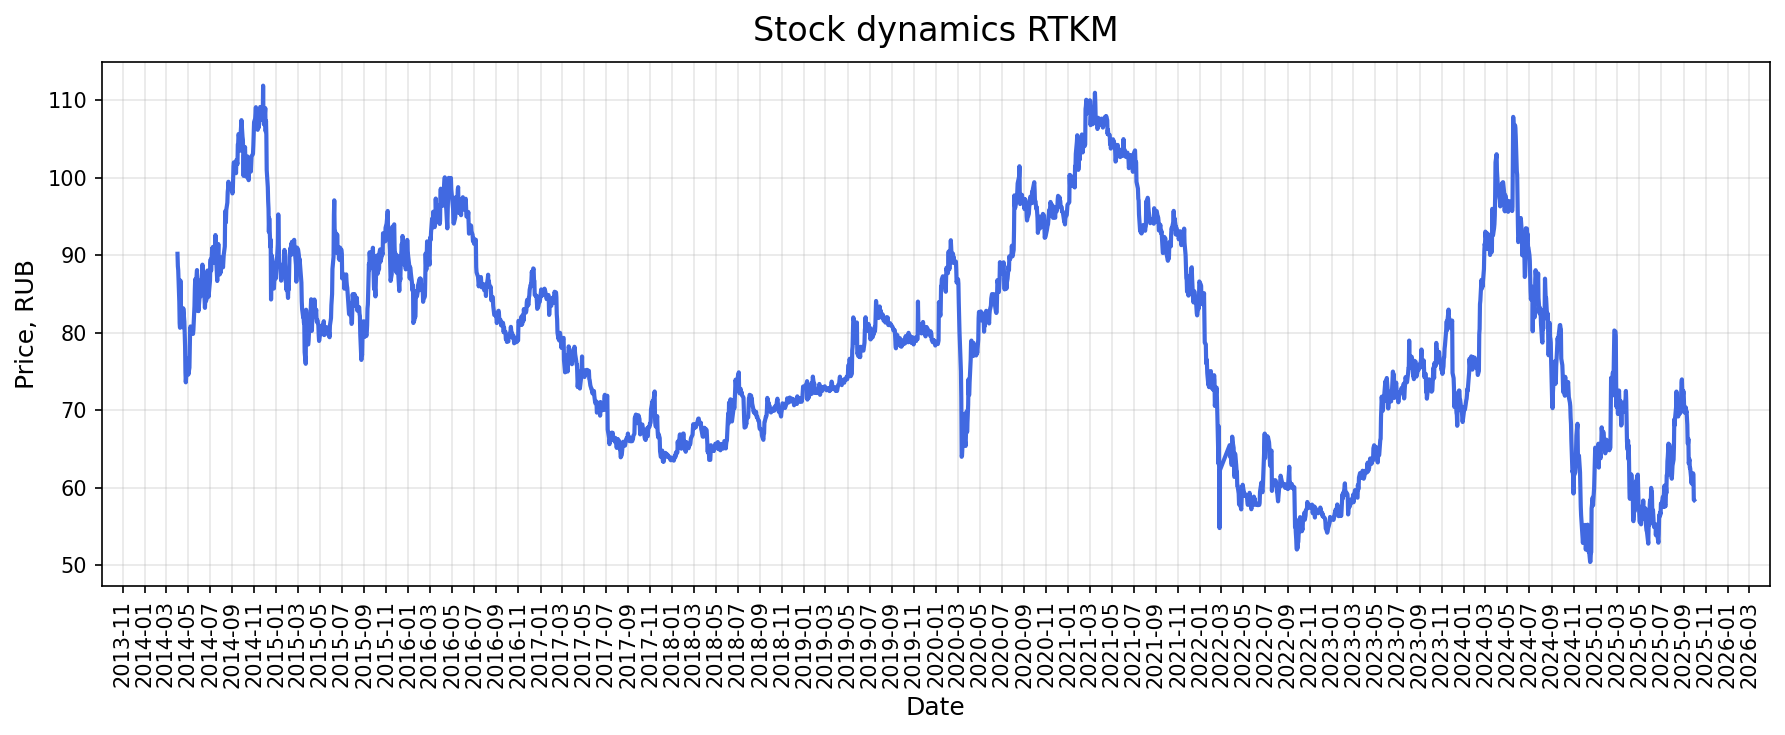

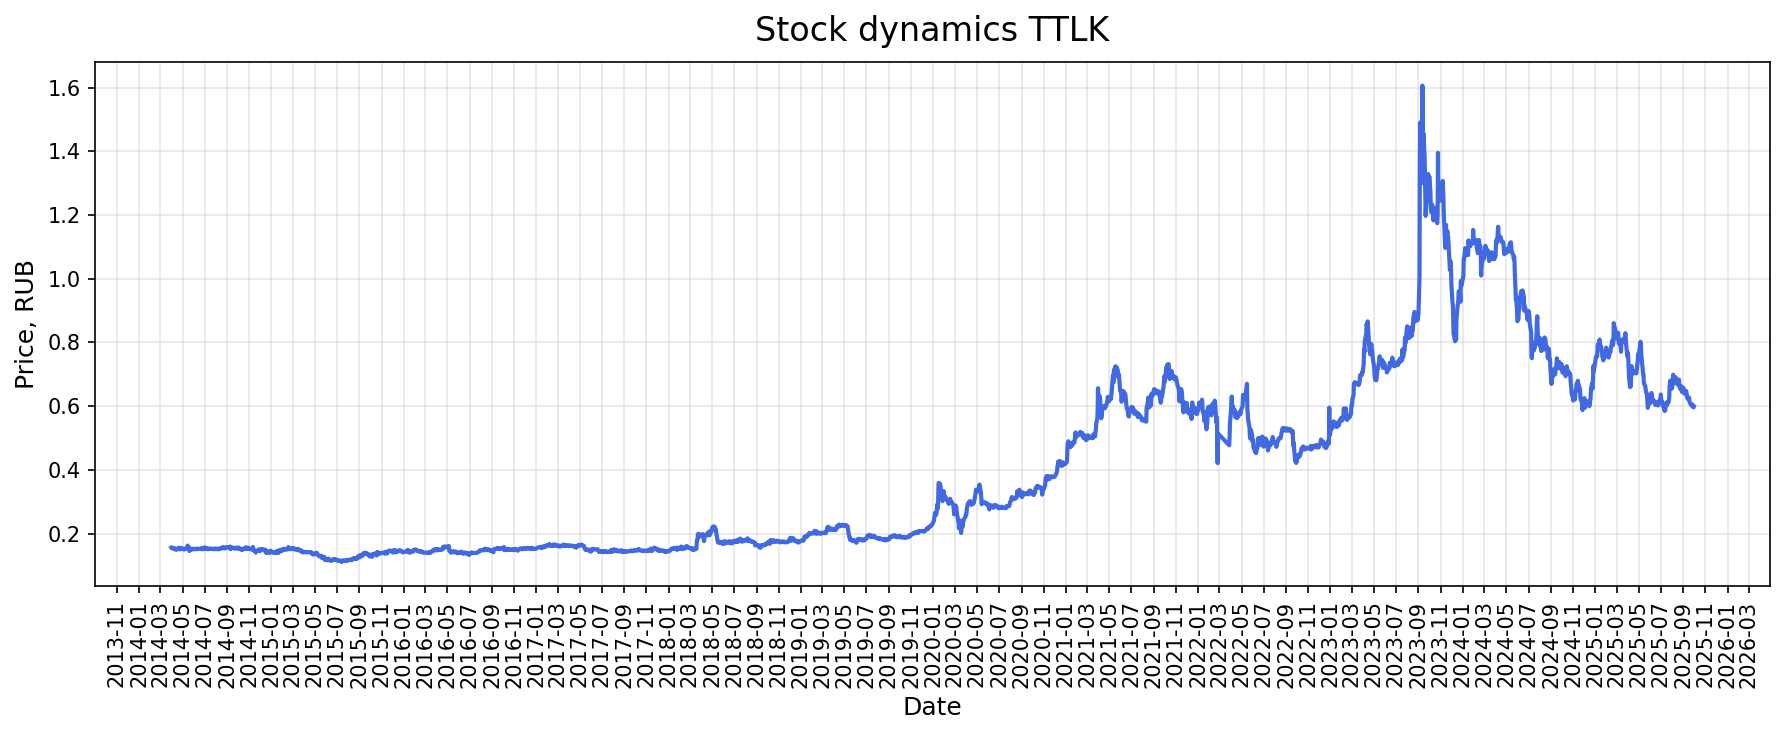

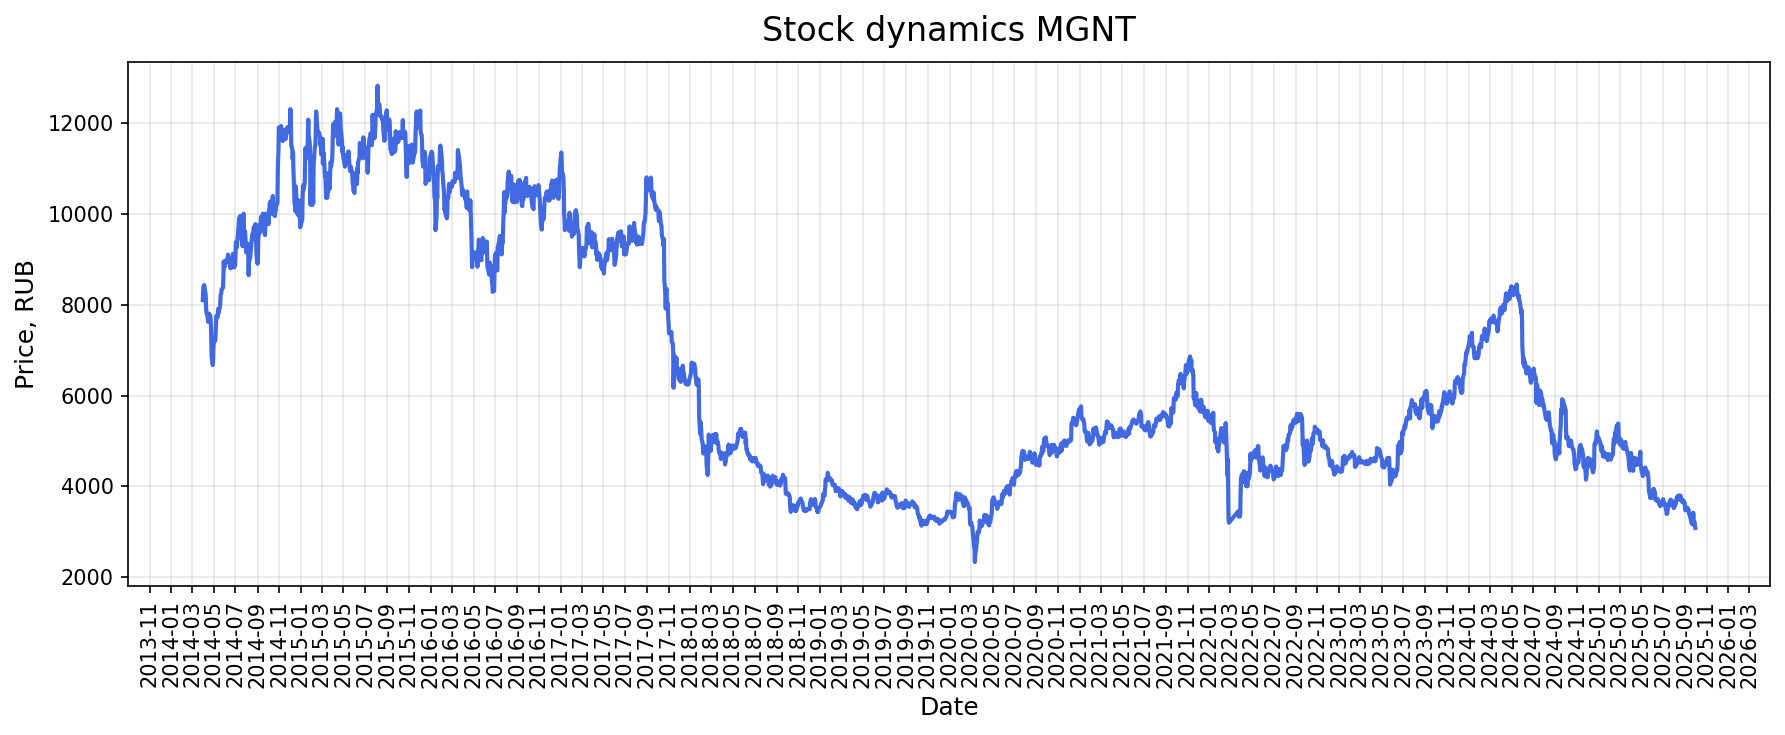

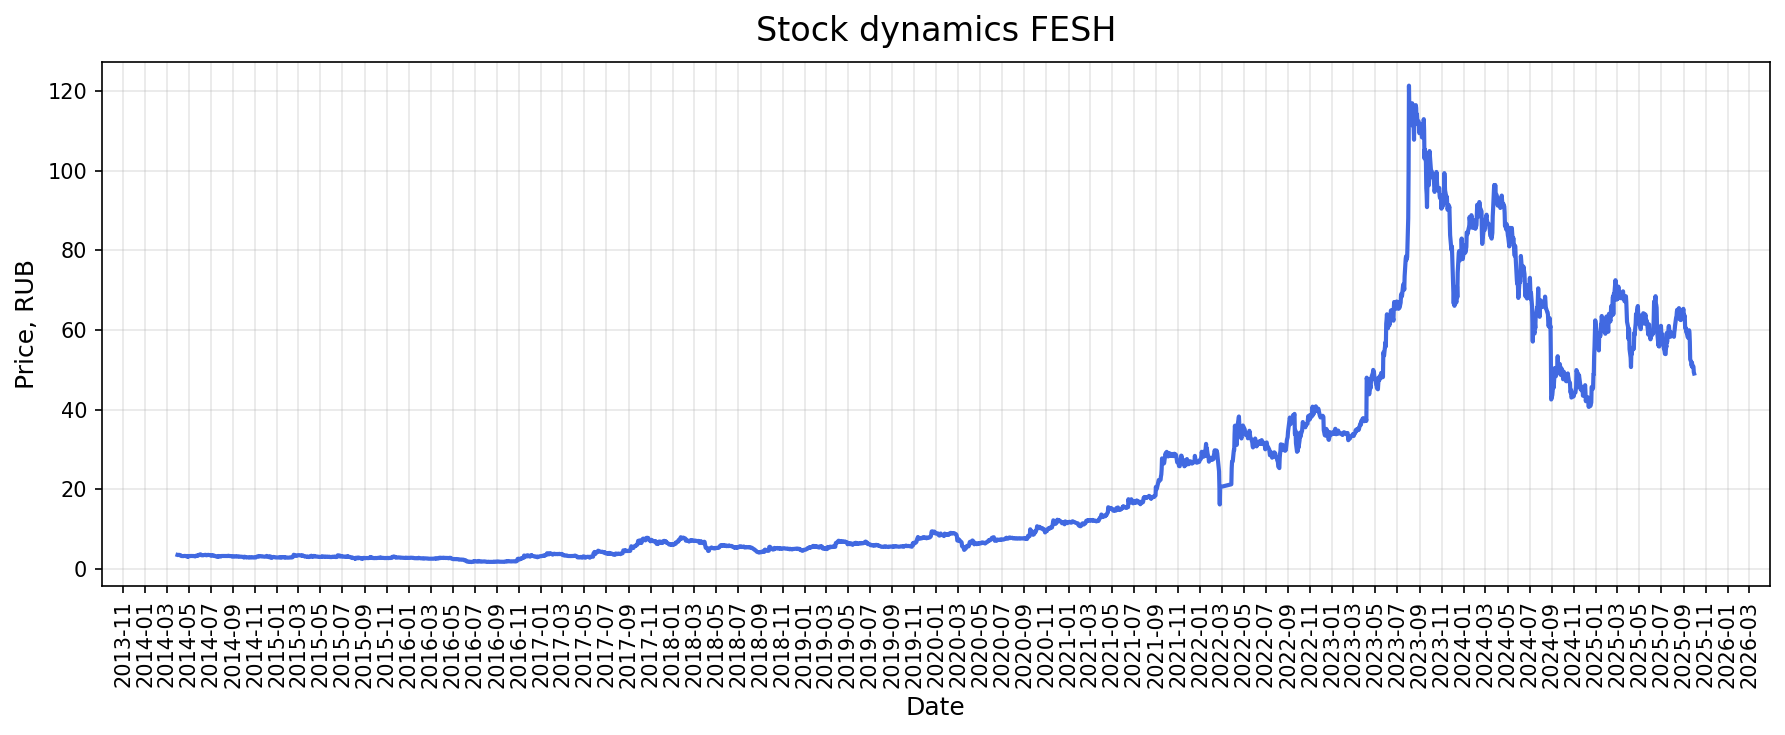

2026-01-08 23:36:43,010:utils.plots:INFO: Stock prices graphs saved: logs/graphs/


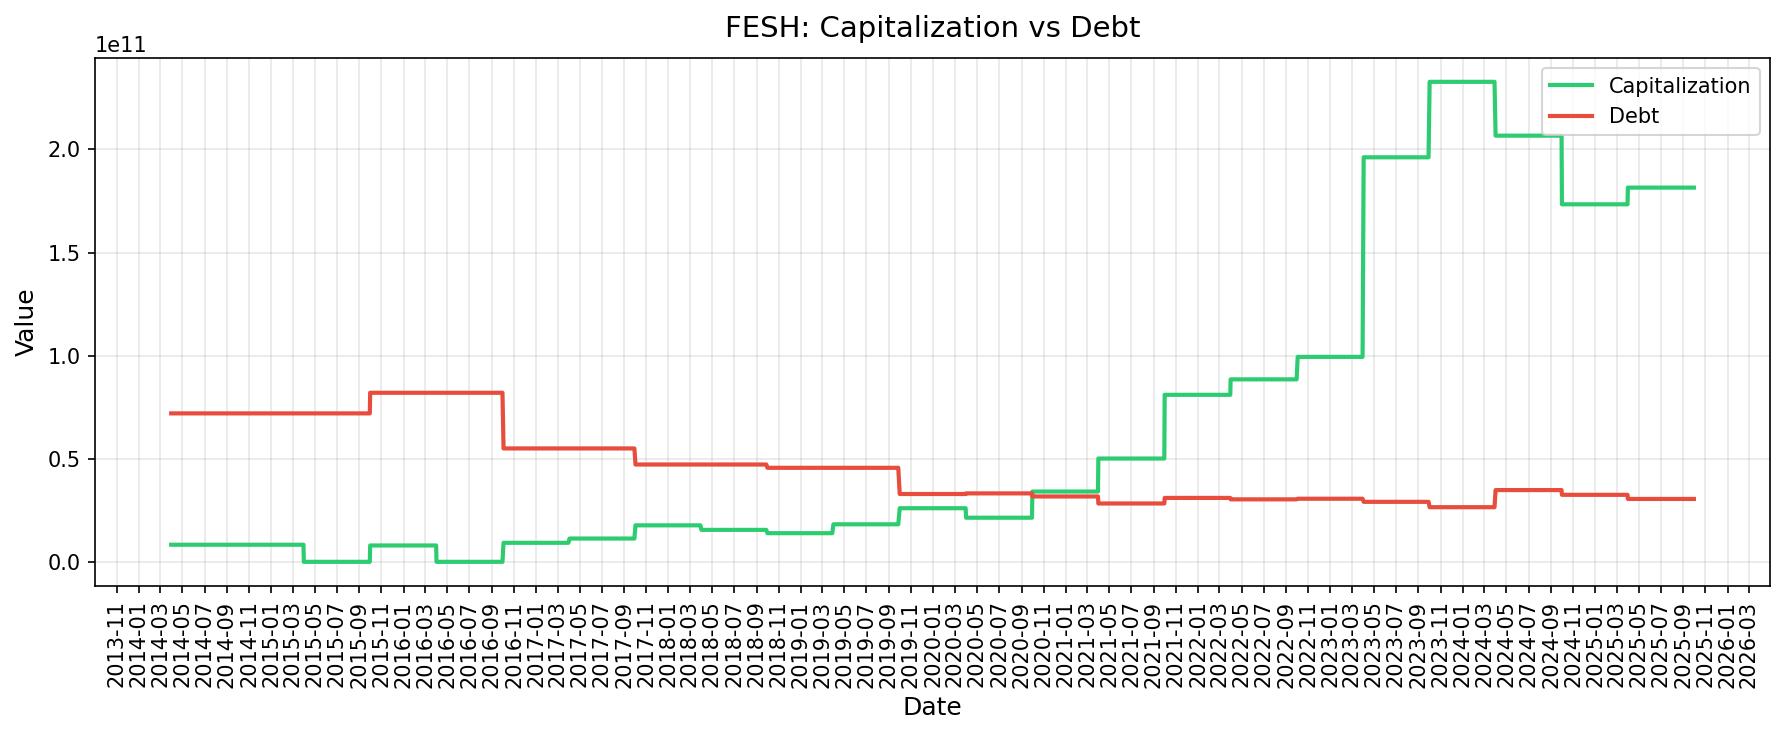

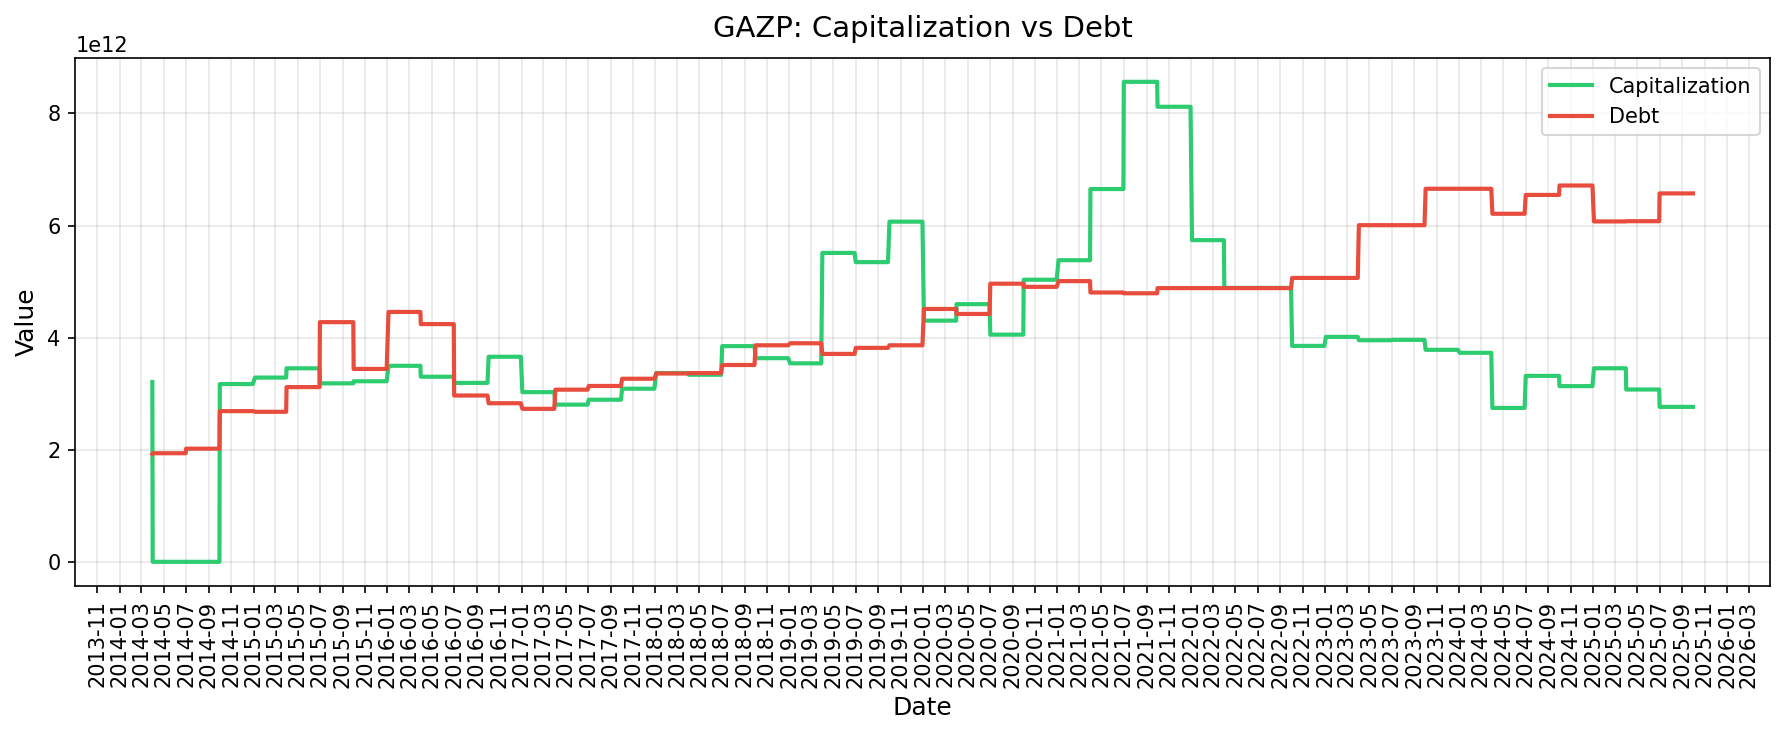

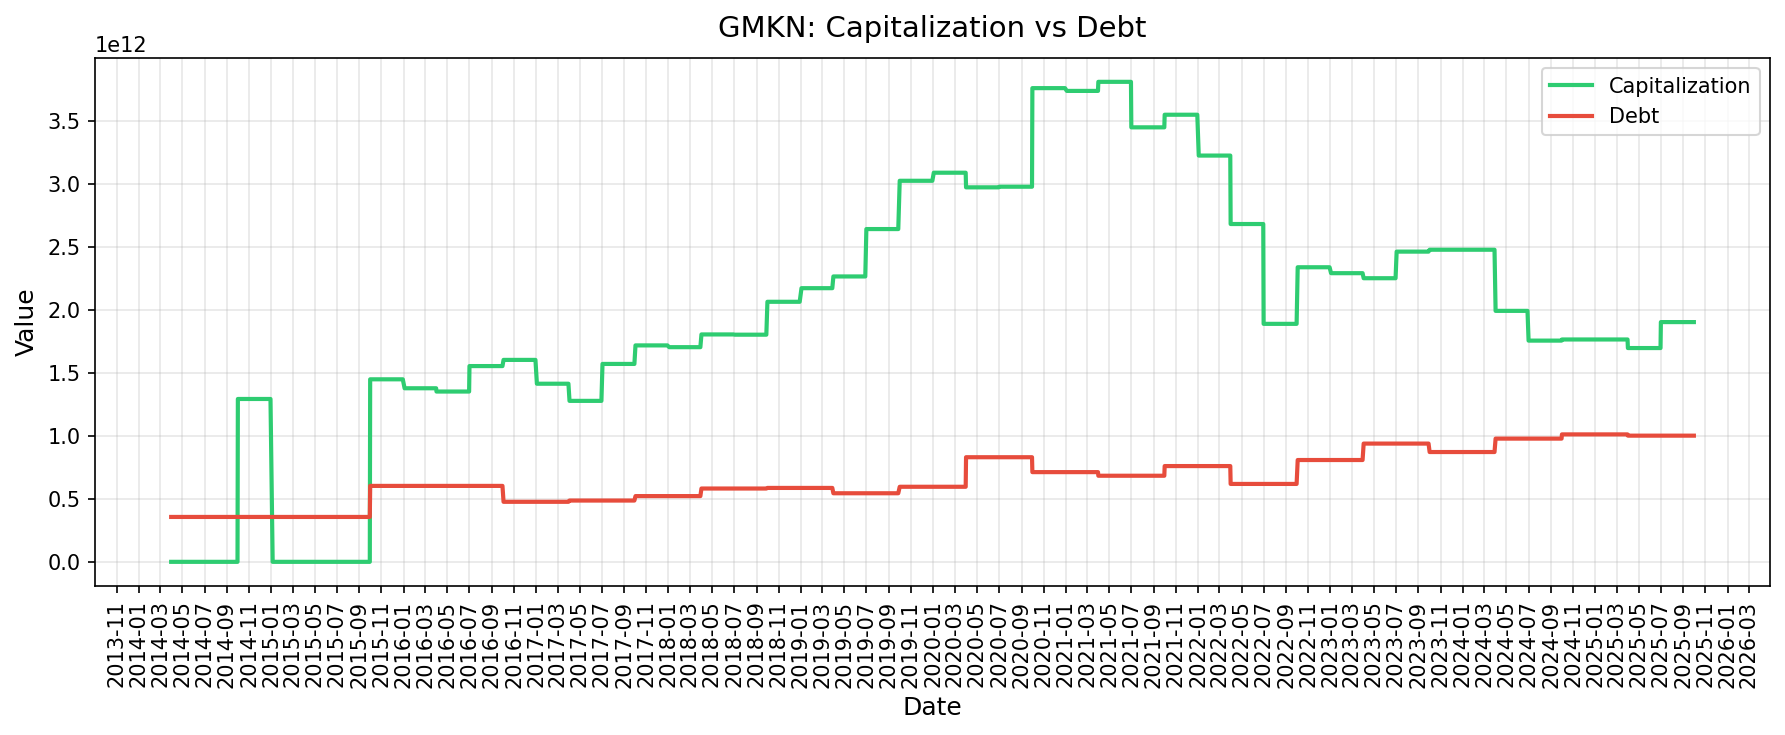

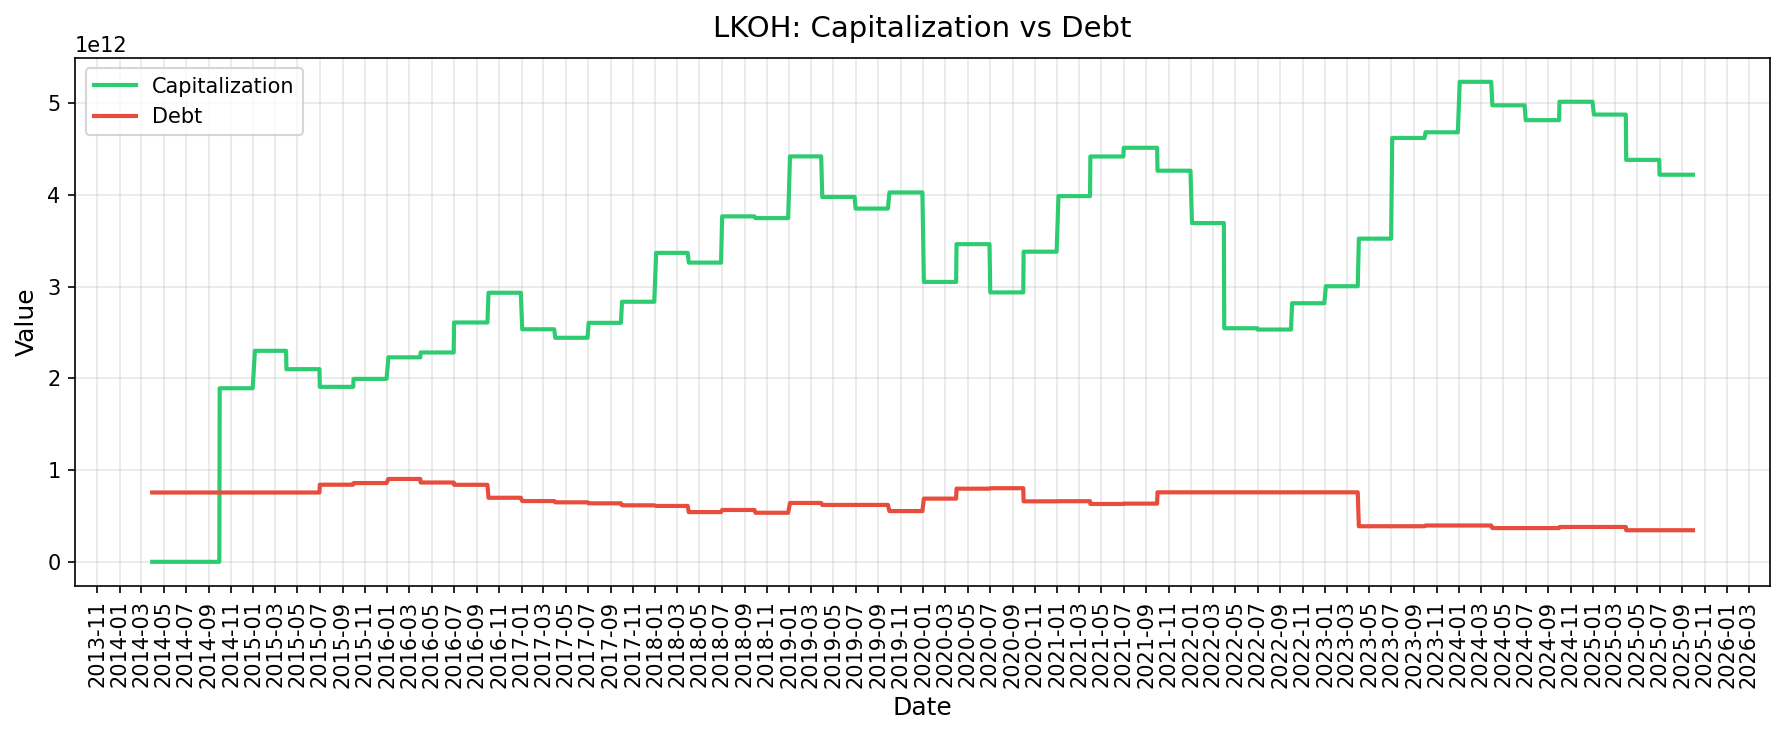

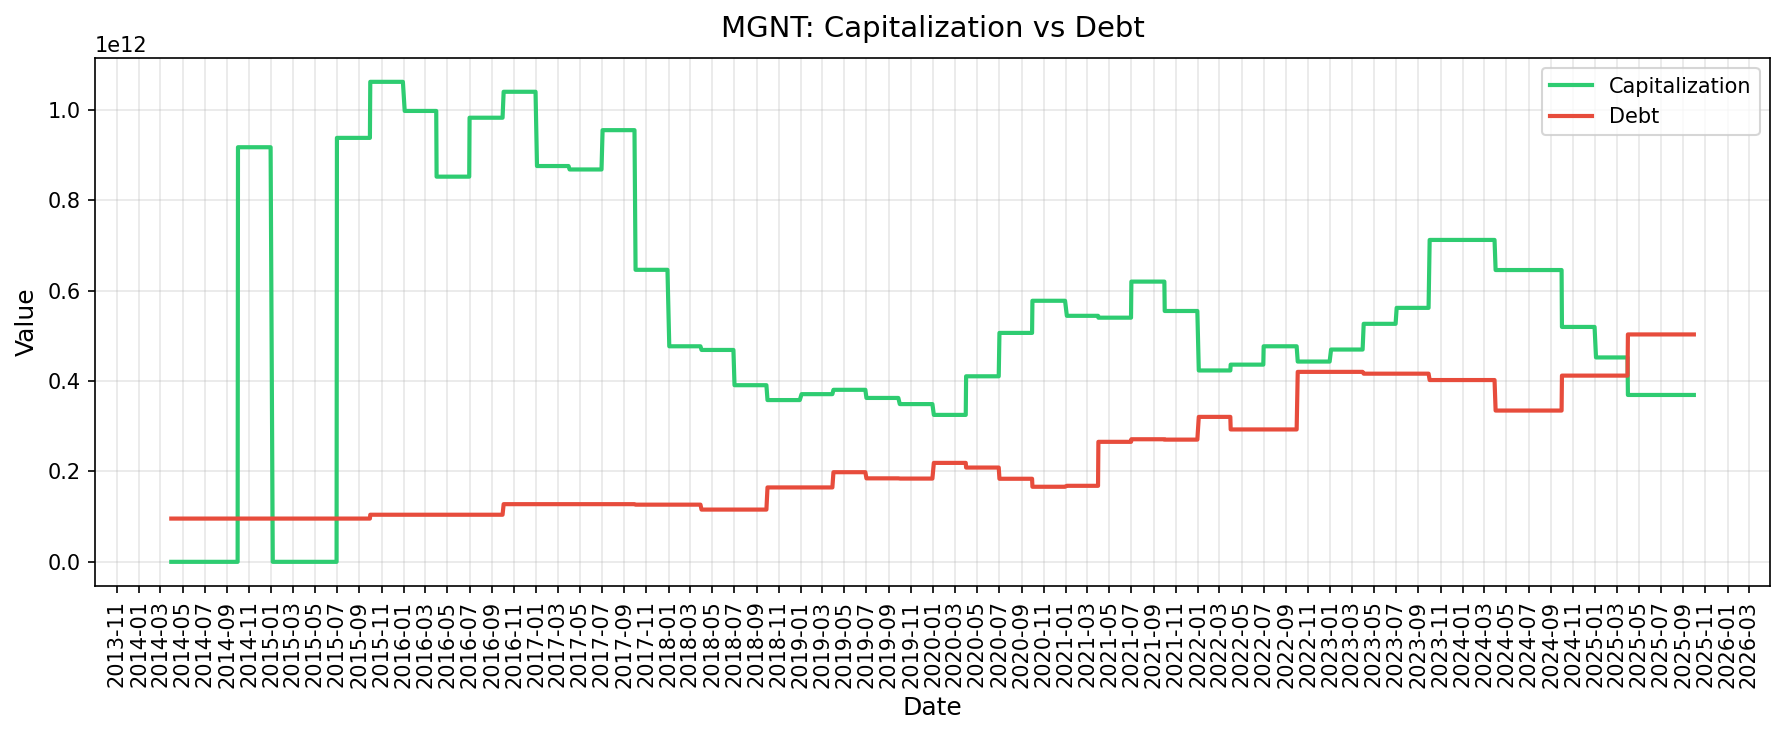

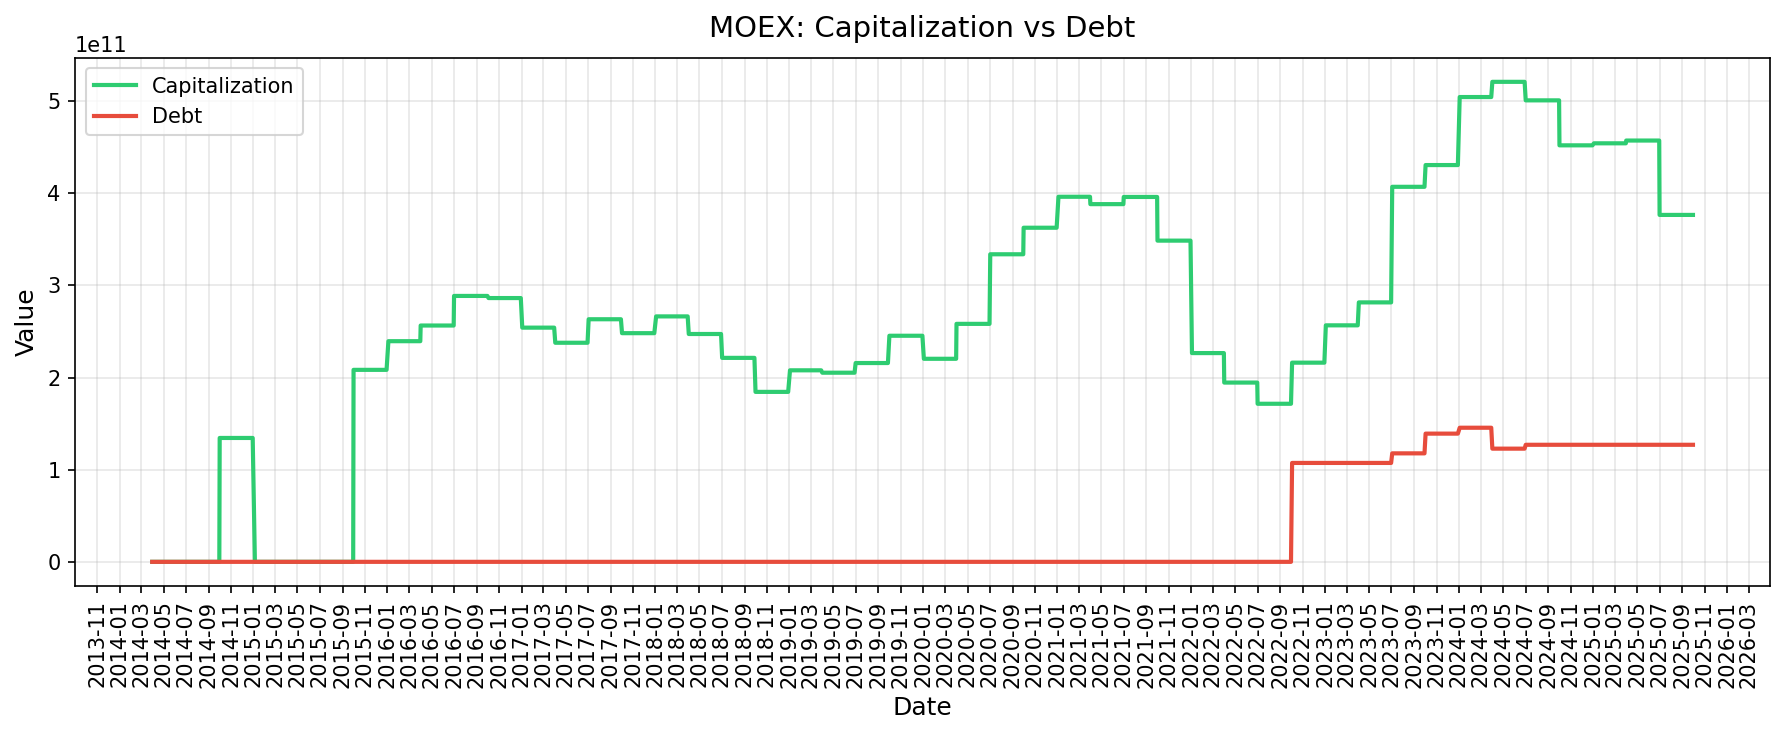

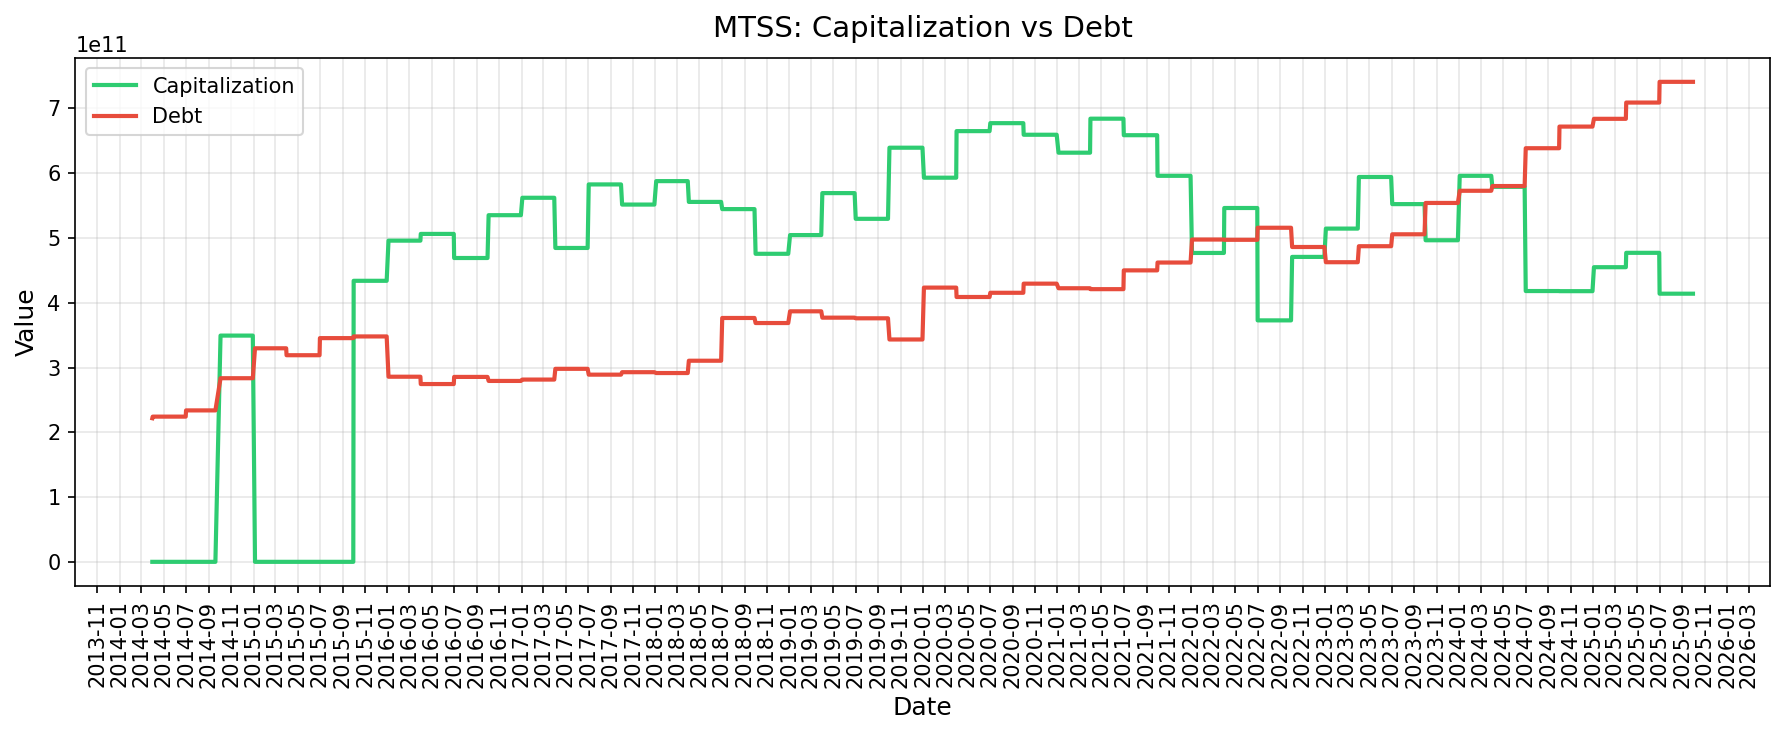

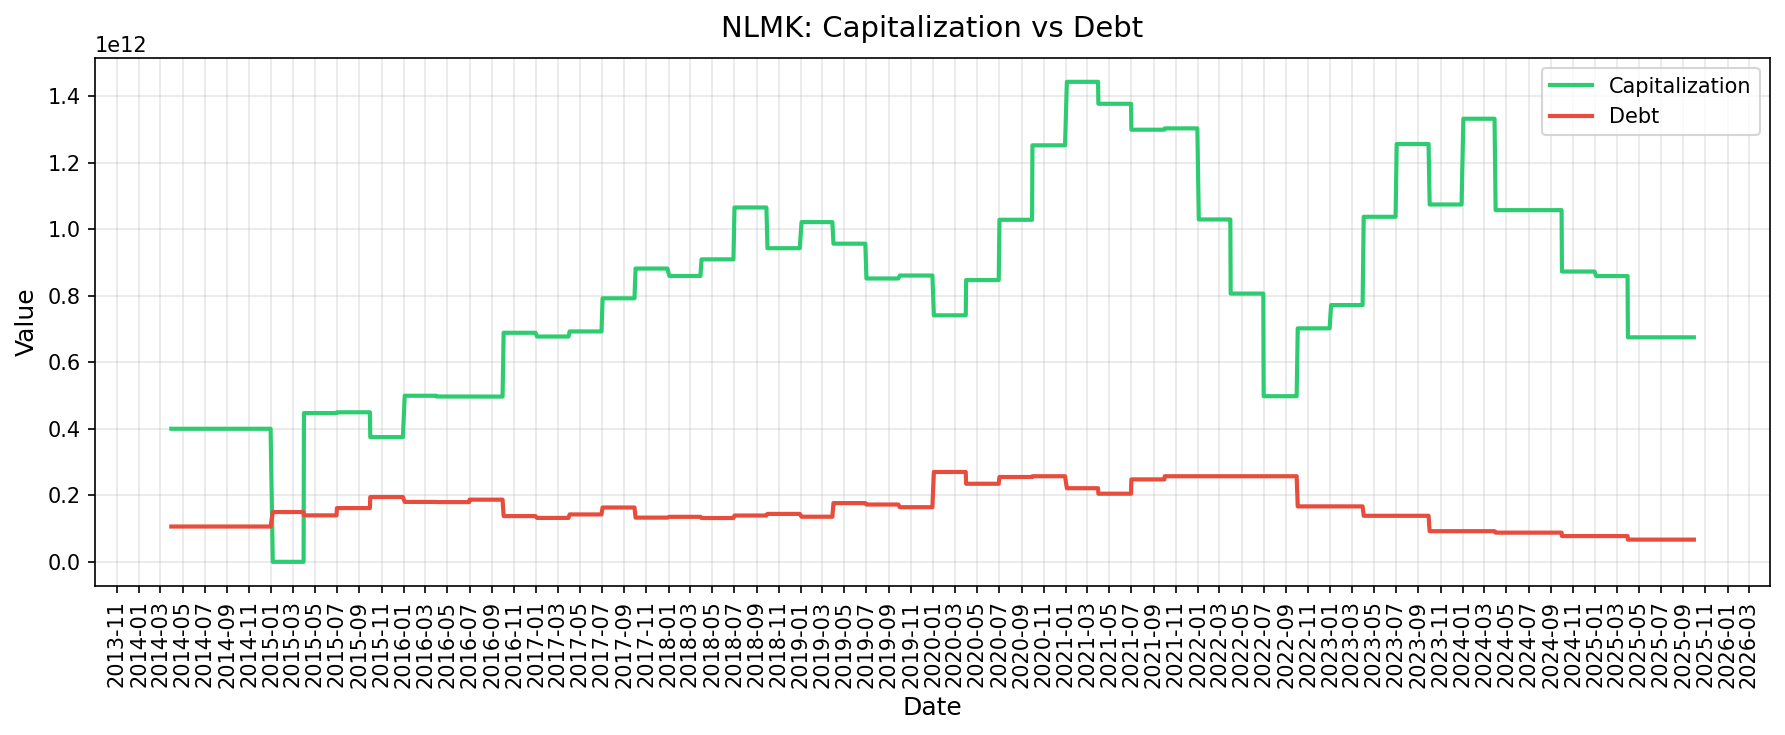

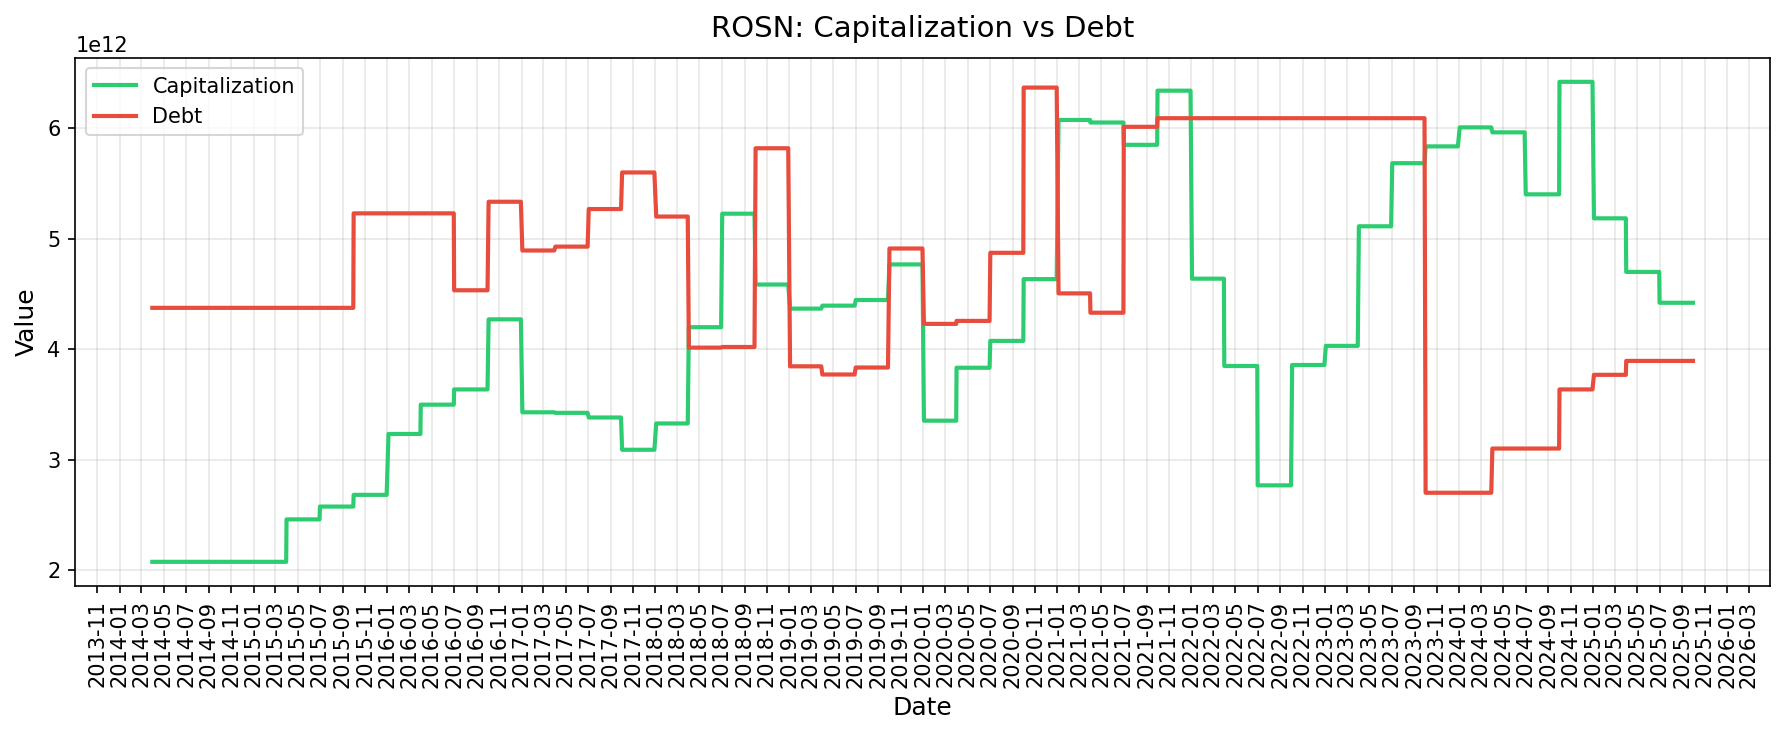

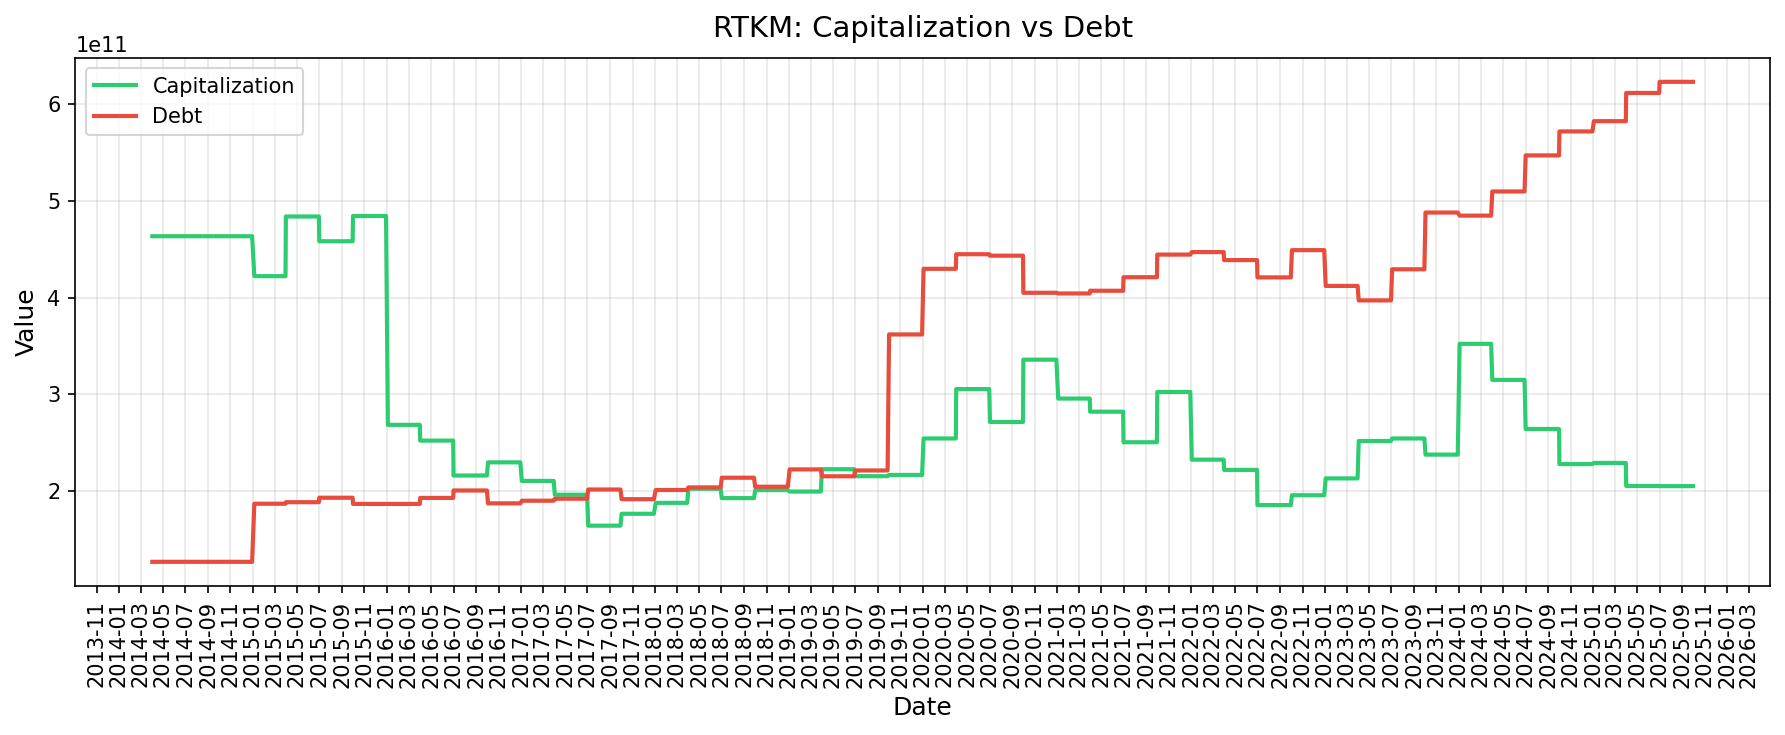

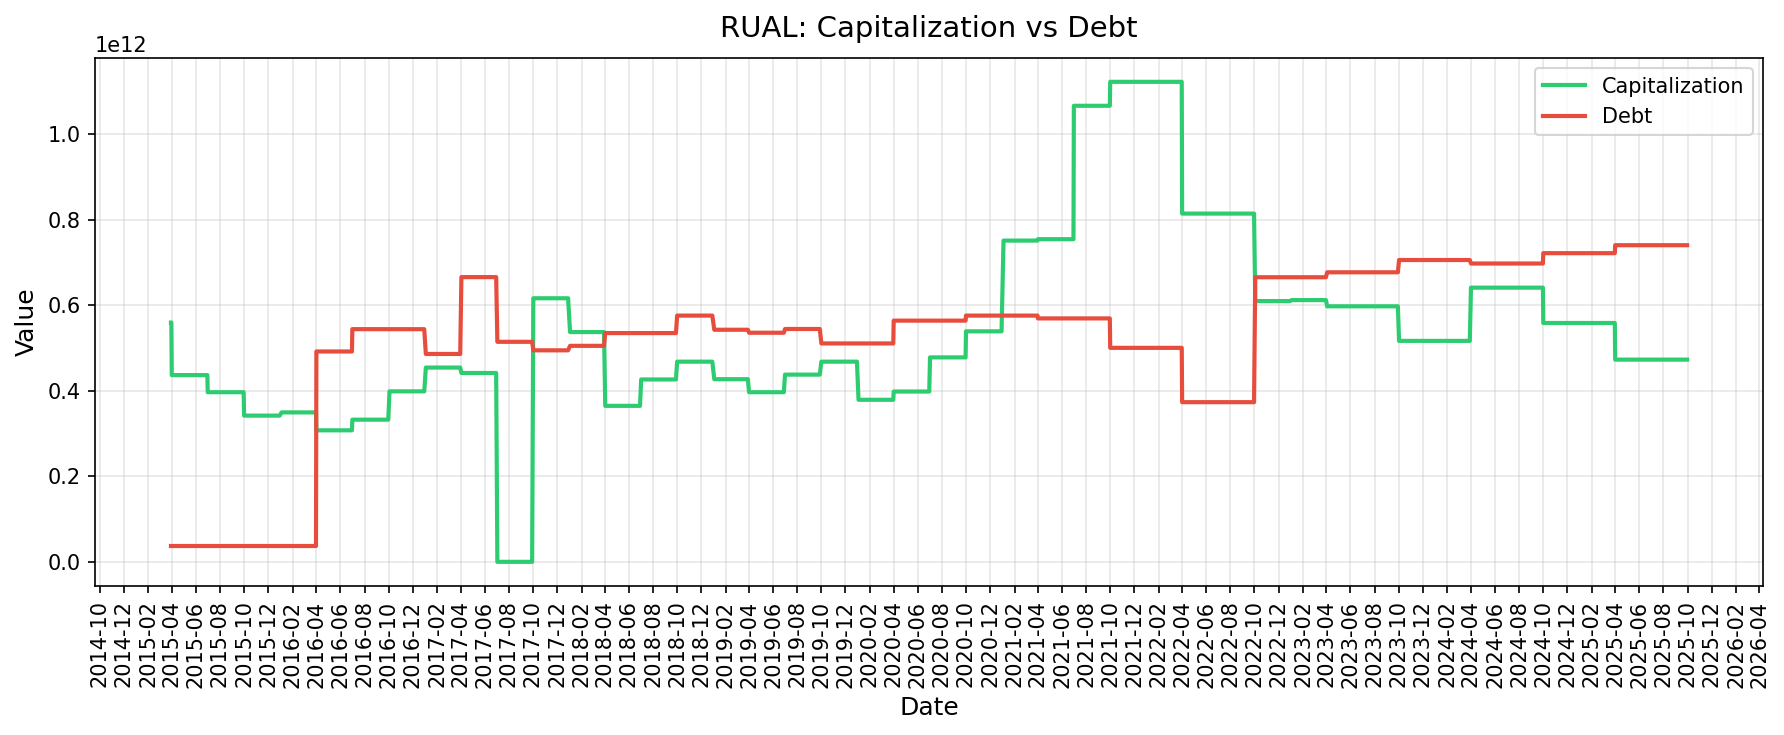

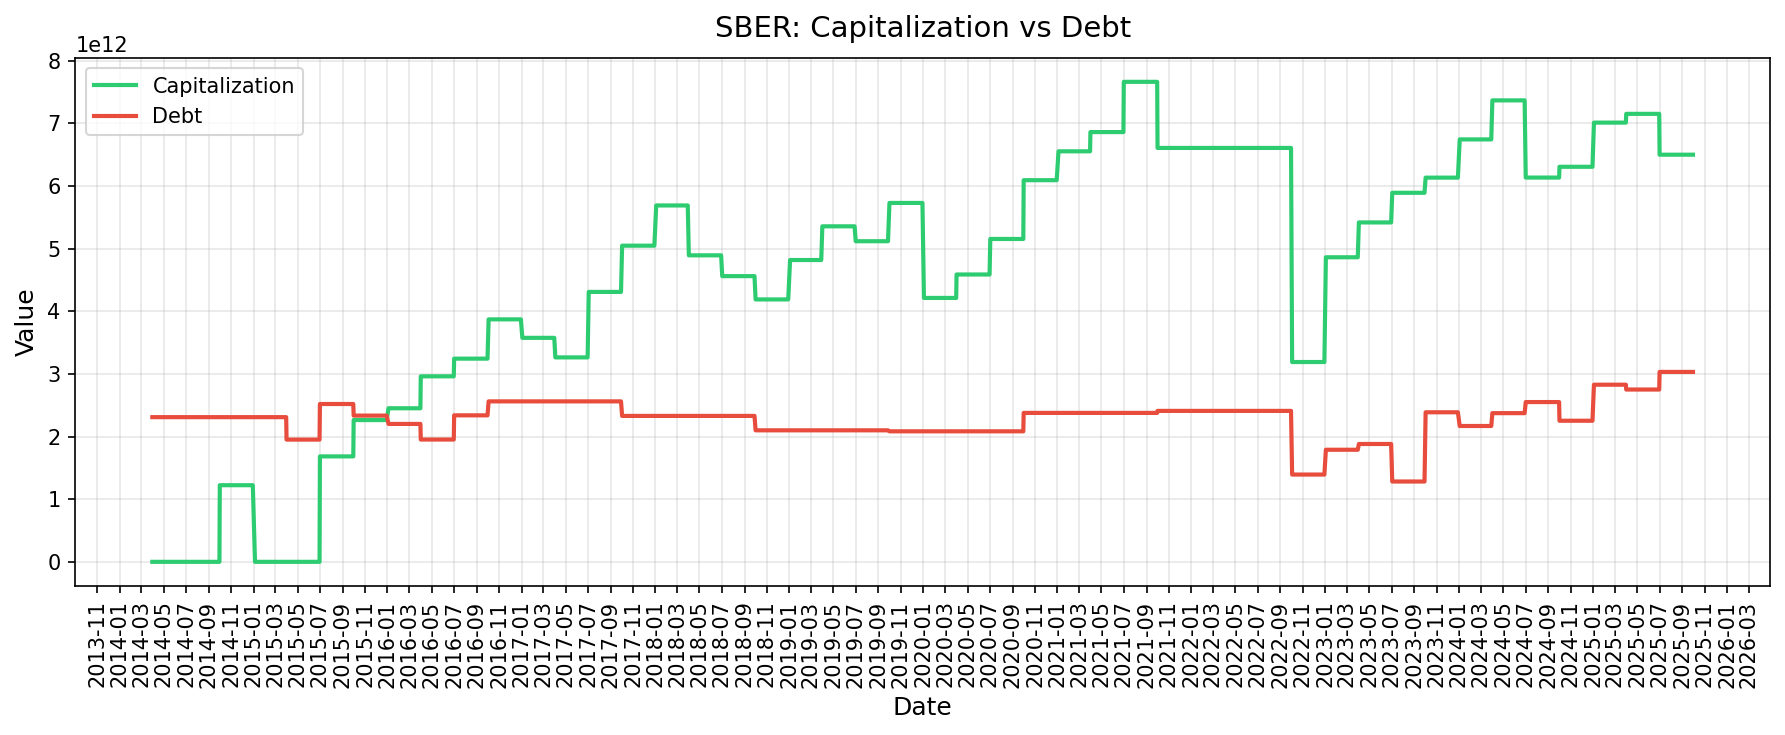

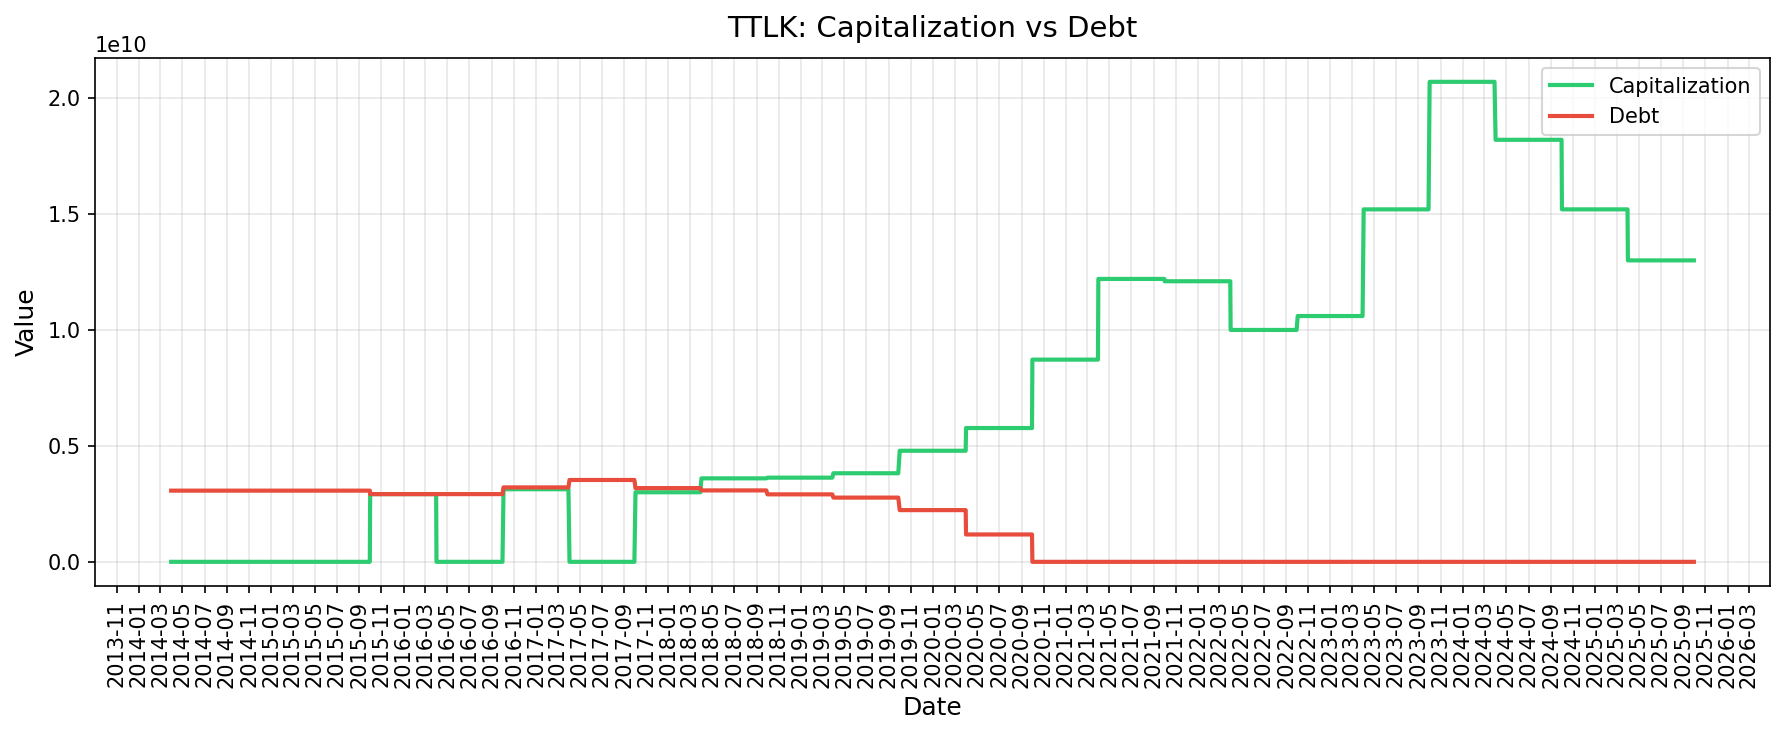

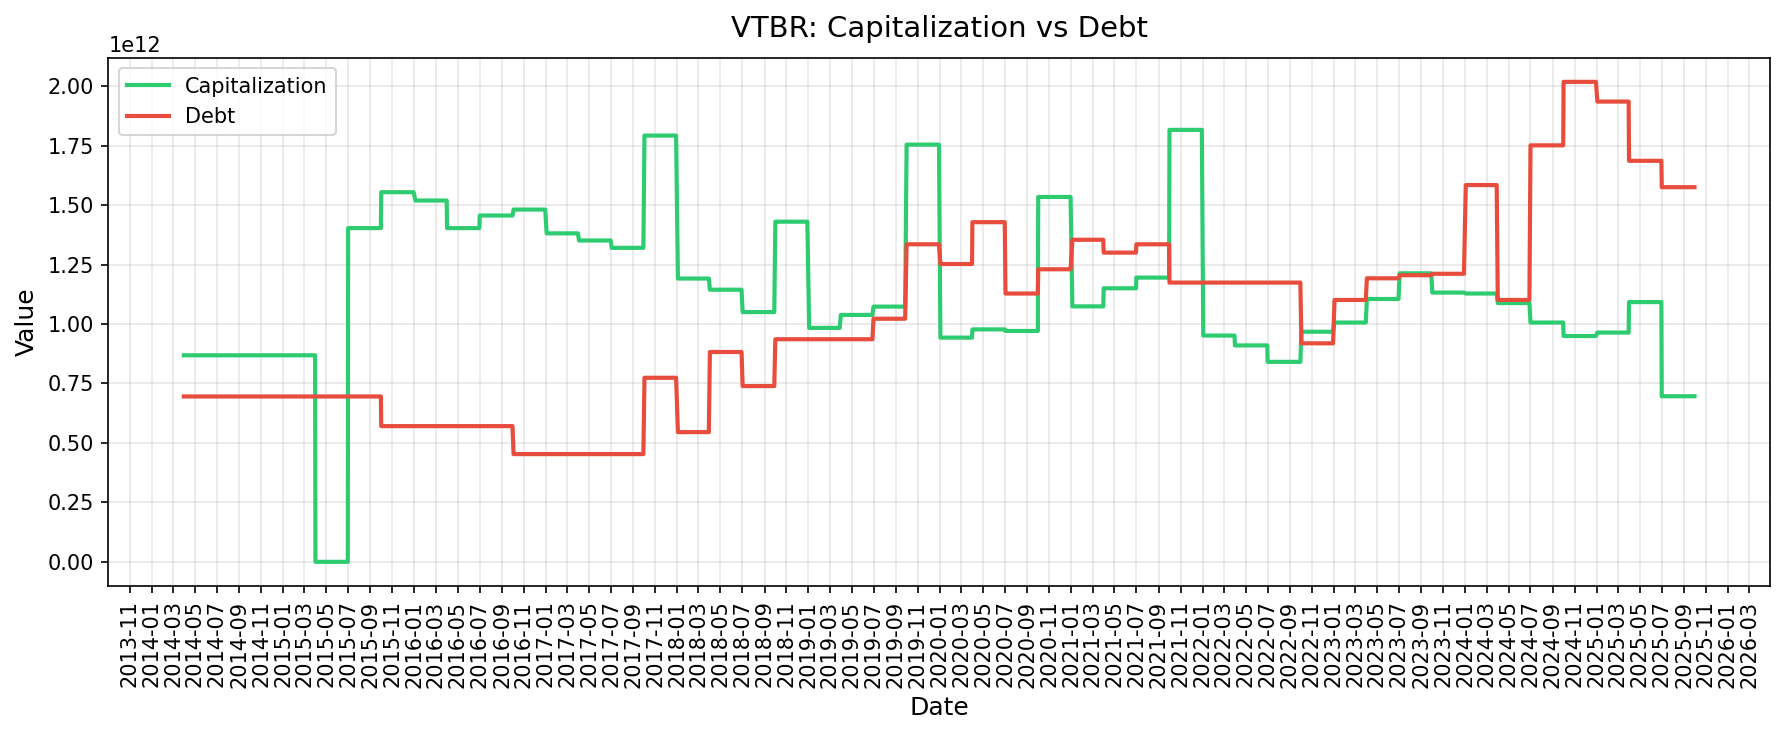

2026-01-08 23:37:08,262:utils.plots:INFO: Capitalization-debt graphs saved: logs/graphs/debt_catitalization.png


In [12]:


calc.add_merton_pd()                                          # выполнить расчет вероятности дефолта по формуле Мертона
calc.plot_pd_by_tickers(tickers=tickers_list, verbose=True, figsize=(12, 5))
calc.plot_stocks(tickers=tickers_list, verbose=True, figsize=(12, 5))         # нарисовать динамику котировок акций
calc.plot_debt_capitalization(verbose=True, figsize=(12, 5))                  # нарисовать динамику долга и стоимости активов
# calc.calc_irf(impulses_responses = {                          # расчитать функции импульсного отклика
#     'inflation': 'PD', 'interest_rate': 'PD',
#     'rubusd_exchange_rate': 'PD', 'unemployment_rate': 'PD'
# }, verbose=True)
# calc.plot_correlation_matrix(custom_order = [                 # нарисовать матрицу корреляций
#     'GAZP', 'LKOH', 'ROSN',                               # Нефтегазовая отрасль
#     'SBER', 'VTBR', 'MOEX',                               # Финансовый сектор
#     'GMKN', 'NLMK', 'RUAL',                               # Металлургия
#     'MTSS', 'RTKM', 'TTLK',                               # Телекоммуникации
#     'MGNT', 'LNTA', 'FESH'                                # Розничная торговля
# ], verbose=False)
# calc.calc_macro_connections()                                 # расчитать регрессию для макропараметров
# calc.log_completion()                                         # вывести в лог сообщение об окончании расчета



In [14]:
calc.d['portfolio']

,ticker,date,open,high,low,close,quarter,year,dtReportLast,P/E,"Долг, млрд руб",capitalization,"Чистый долг, млрд руб",interest_rate,inflation,unemployment_rate,rubusd_exchange_rate,debt,volatility,PD
12292,FESH,2018-11-06,5.090,5.130,5.005,5.125,4,2018,2018-11-30,2.07,4.560000e+10,1.390000e+10,4.230000e+10,NaN,0.1368,0.1368,NaN,4.560000e+10,0.450275,NaN
12293,FESH,2018-11-07,5.135,5.160,5.000,5.090,4,2018,2018-11-30,2.07,4.560000e+10,1.390000e+10,4.230000e+10,NaN,0.1368,0.1368,NaN,4.560000e+10,0.450275,NaN
12294,FESH,2018-11-08,5.010,5.115,5.010,5.080,4,2018,2018-11-30,2.07,4.560000e+10,1.390000e+10,4.230000e+10,NaN,0.1368,0.1368,NaN,4.560000e+10,0.450275,NaN
12295,FESH,2018-11-09,5.040,5.060,5.000,5.025,4,2018,2018-11-30,2.07,4.560000e+10,1.390000e+10,4.230000e+10,NaN,0.1368,0.1368,NaN,4.560000e+10,0.450275,NaN
12296,FESH,2018-11-12,5.070,5.070,5.000,5.055,4,2018,2018-11-30,2.07,4.560000e+10,1.390000e+10,4.230000e+10,NaN,0.1368,0.1368,NaN,4.560000e+10,0.450275,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17237,VTBR,2025-08-27,76.400,76.970,76.070,76.550,3,2025,2025-08-31,1.82,NaN,9.727000e+11,-1.575000e+12,0.18,0.0814,0.0814,80.5268,1.575000e+12,0.342503,0.000096
17238,VTBR,2025-08-28,76.650,76.870,75.460,75.900,3,2025,2025-08-31,1.82,NaN,9.727000e+11,-1.575000e+12,0.18,0.0814,0.0814,80.4421,1.575000e+12,0.342503,0.000096
17239,VTBR,2025-08-29,76.030,76.150,74.600,75.150,3,2025,2025-08-31,1.82,NaN,9.727000e+11,-1.575000e+12,0.18,0.0814,0.0814,80.2918,1.575000e+12,0.342503,0.000096
17240,VTBR,2025-08-30,75.200,75.270,74.970,75.040,3,2025,2025-08-31,1.82,NaN,9.727000e+11,-1.575000e+12,0.18,0.0814,0.0814,80.3316,1.575000e+12,0.342503,0.000096


In [ ]:
# 🧪 ТЕСТ 4: Что происходит при ПОВТОРНОМ создании Portfolio без reload?
print("=" * 80)
print("ТЕСТ 4: Создаем ВТОРОЙ экземпляр Portfolio БЕЗ reload cell")
print("=" * 80)

# Создадим второй Portfolio без очистки handlers
calc2 = Portfolio(
    dt_calc='2025-05-31',
    dt_start='2019-11-03',
    stocks_step=10,
    tickers_list=tickers_list
)

# Проверяем handlers
portfolio_logger = logging.getLogger('utils.portfolio')
print(f"\nКоличество handlers после создания calc2: {len(portfolio_logger.handlers)}")
for i, h in enumerate(portfolio_logger.handlers):
    print(f"  Handler {i+1}: {type(h).__name__} (ID: {id(h)})")

# Тестируем логирование
print("\nЛогируем 2 сообщения через calc2.logger:")
calc2.logger.info("[CALC2] First message")
calc2.logger.info("[CALC2] Second message")

print("\n" + "=" * 80)
print("⚠️ ПРОВЕРЬТЕ:")
print("  - Если handlers добавились ДВА РАЗА - это проблема!")
print("  - Если handlers остались 2 штуки - всё работает правильно!")
print("=" * 80)


2025-11-11 00:44:27,787:utils.portfolio.Portfolio:INFO: Portfolio instance created with dt_calc=2025-05-31, dt_start=2019-11-03
2025-11-11 00:44:27,789:utils.portfolio.Portfolio:INFO: [CALC2] First message
2025-11-11 00:44:27,791:utils.portfolio.Portfolio:INFO: [CALC2] Second message


ТЕСТ 4: Создаем ВТОРОЙ экземпляр Portfolio БЕЗ reload cell

Количество handlers после создания calc2: 2
  Handler 1: StreamHandler (ID: 2003899582992)
  Handler 2: FileHandler (ID: 2003899593488)

Логируем 2 сообщения через calc2.logger:

⚠️ ПРОВЕРЬТЕ:
  - Если handlers добавились ДВА РАЗА - это проблема!
  - Если handlers остались 2 штуки - всё работает правильно!


In [ ]:
calc.macro_connection_summary

In [ ]:
# Используем встроенный метод класса Portfolio
calc.plot_macro_significance(
    save_path='logs/graphs/macro_significance_summary.png',
    verbose=True,
    figsize=(10, 6)
)

ValueError: Macro connection summary not calculated. Run calc_macro_connections() first.

In [ ]:
get_rubusd_exchange_rate(use_backup=True,update_backup=False)

Exchange rates for usd/rub will be use from backup. Last actual date: 2025-05-31


,date,rubusd_exchange_rate
0,2019-11-03,64.0316
1,2019-11-04,64.0316
2,2019-11-05,64.0316
3,2019-11-06,63.2480
4,2019-11-07,63.5880
...,...,...
2032,2025-05-27,79.6588
2033,2025-05-28,79.6176
2034,2025-05-29,79.6037
2035,2025-05-30,78.4970


## Анализ макроэкономических связей с помощью встроенного метода

Используем метод `calc_macro_connections` для статистического анализа влияния макроэкономических факторов на параметры модели Мертона (капитализация и долг компаний).

In [ ]:
macro_summary.head(5)

,ticker,target,best_alpha,mse_model,mse_baseline,r2,coef_inflation,coef_inflation_ci,coef_unemployment,coef_unemployment_ci,coef_usd_rub,coef_usd_rub_ci
0,FESH,debt,100.000000,0.007767,0.008085,-0.008298,-0.001078,"[-0.004, 0.002]",0.004729,"[-0.002, 0.012]",-0.001864,"[-0.008, 0.004]"
1,FESH,capitalization,0.001000,0.097799,0.887980,0.889851,0.008658,"[-0.067, 0.133]",-0.716768,"[-0.823, -0.577]",0.038045,"[-0.056, 0.164]"
2,GAZP,debt,5.963623,0.003915,0.021115,0.814210,-0.009842,"[-0.025, 0.013]",-0.073216,"[-0.087, -0.055]",0.053612,"[0.037, 0.073]"
3,GAZP,capitalization,7.543120,0.045438,0.067220,0.323264,0.039113,"[-0.000, 0.075]",0.087186,"[0.047, 0.138]",-0.024845,"[-0.071, 0.020]"
4,GMKN,debt,1.456348,0.014184,0.023292,0.389610,-0.045151,"[-0.072, -0.019]",-0.060431,"[-0.100, -0.029]",0.074262,"[0.041, 0.106]"
